# Resumen de los Análisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('C:/Users/jmorano/Documents/Plantillas personalizadas de Office/Coderhouse/Data Science/Modulo 2 - Data Science Fundamentos para la Ciencia de Datos II/Proyecto - Juan Martin Morano/Data/Processed/full_data_flightdelay_processed.csv', sep=',')

In [5]:
# Función para clasificar columnas en continuas, discretas y categóricas
def classify_columns(df):
    # Identificar columnas numéricas y categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns
    discrete_columns = [col for col in df.select_dtypes(include=['int']).columns if df[col].nunique() < 20]
    continuous_columns = [col for col in df.select_dtypes(include=['float', 'int']).columns if col not in discrete_columns]
    
    return discrete_columns, continuous_columns, categorical_columns

discrete_columns, continuous_columns, categorical_columns = classify_columns(df)

if 'Unnamed: 0' in continuous_columns:
    continuous_columns.remove('Unnamed: 0')

print("Discretas:", discrete_columns)
print("Continuas:", continuous_columns)
print("Categóricas:", categorical_columns)

Discretas: ['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'AVG_MONTHLY_PASS_AIRLINE']
Continuas: ['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']
Categóricas: Index(['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT'],
      dtype='object')


## Feature Selection (Without Transformation)

### Barplot

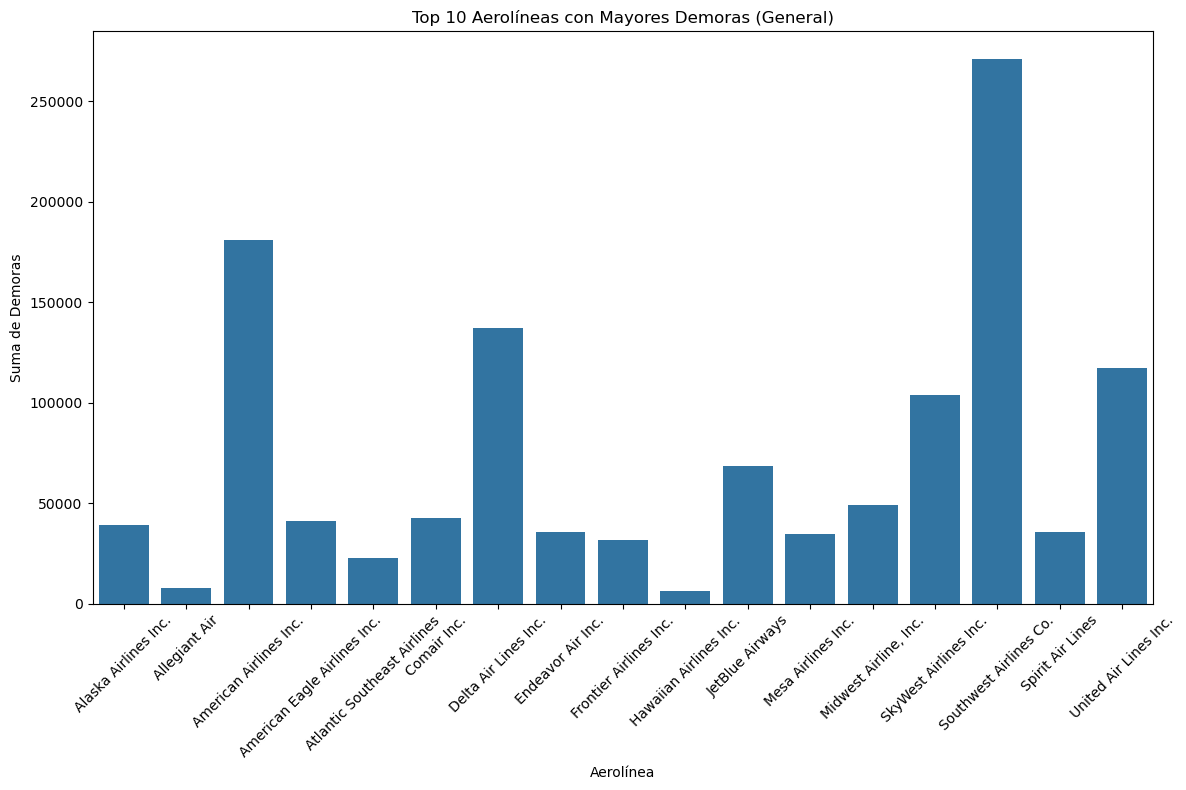

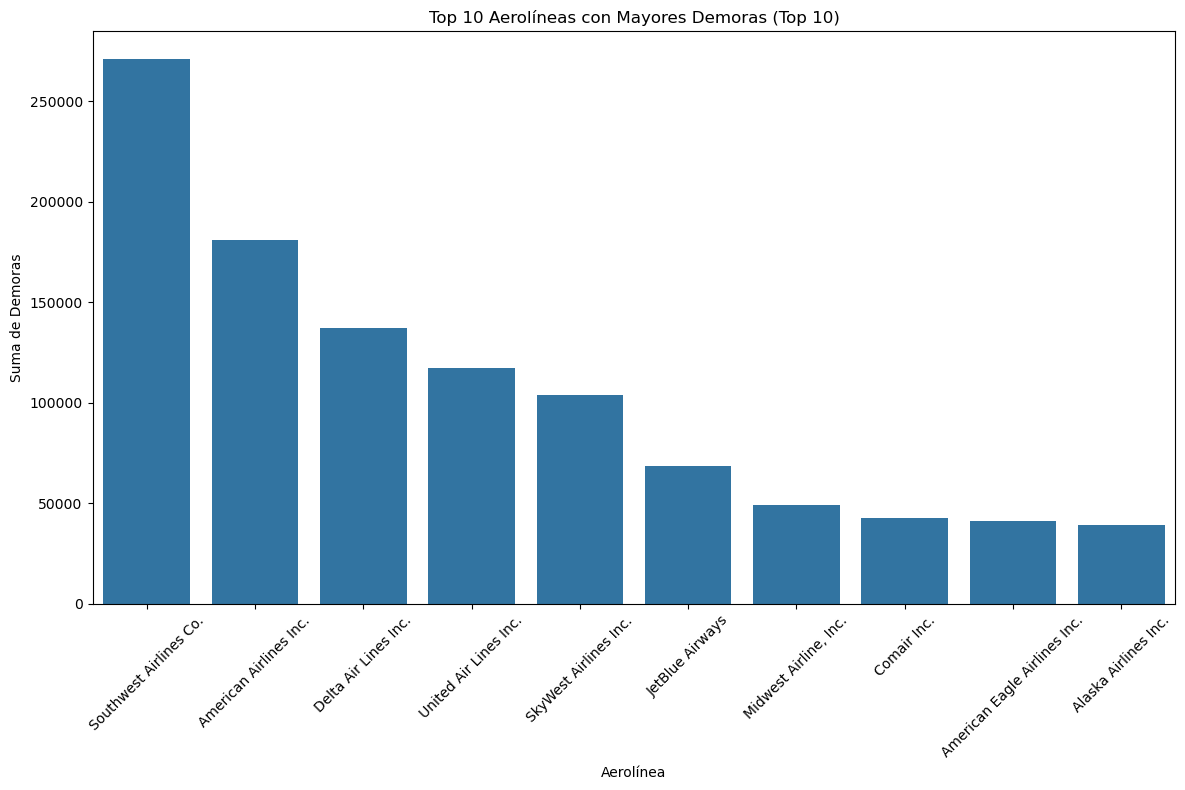

In [19]:
# Se realiza la agrupación por suma de DEP_DEL15 (suma de valores en 1 que representan que SI hubo una demora)
carrier_delays = df.groupby('CARRIER_NAME')['DEP_DEL15'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=carrier_delays, x='CARRIER_NAME', y='DEP_DEL15')
plt.title('Top 10 Aerolíneas con Mayores Demoras (General)')
plt.xlabel('Aerolínea')
plt.ylabel('Suma de Demoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#--------------------------------------------------------------------------------
#En el siguiente gráfico pasamos a ordenar en un top 10 las principales aerolineas 
#de mayor a menor (en función de las demoras)

top10_categories = carrier_delays.nlargest(10, 'DEP_DEL15').sort_values(by='DEP_DEL15', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_categories, x='CARRIER_NAME', y='DEP_DEL15')
plt.title('Top 10 Aerolíneas con Mayores Demoras (Top 10)')
plt.xlabel('Aerolínea')
plt.ylabel('Suma de Demoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

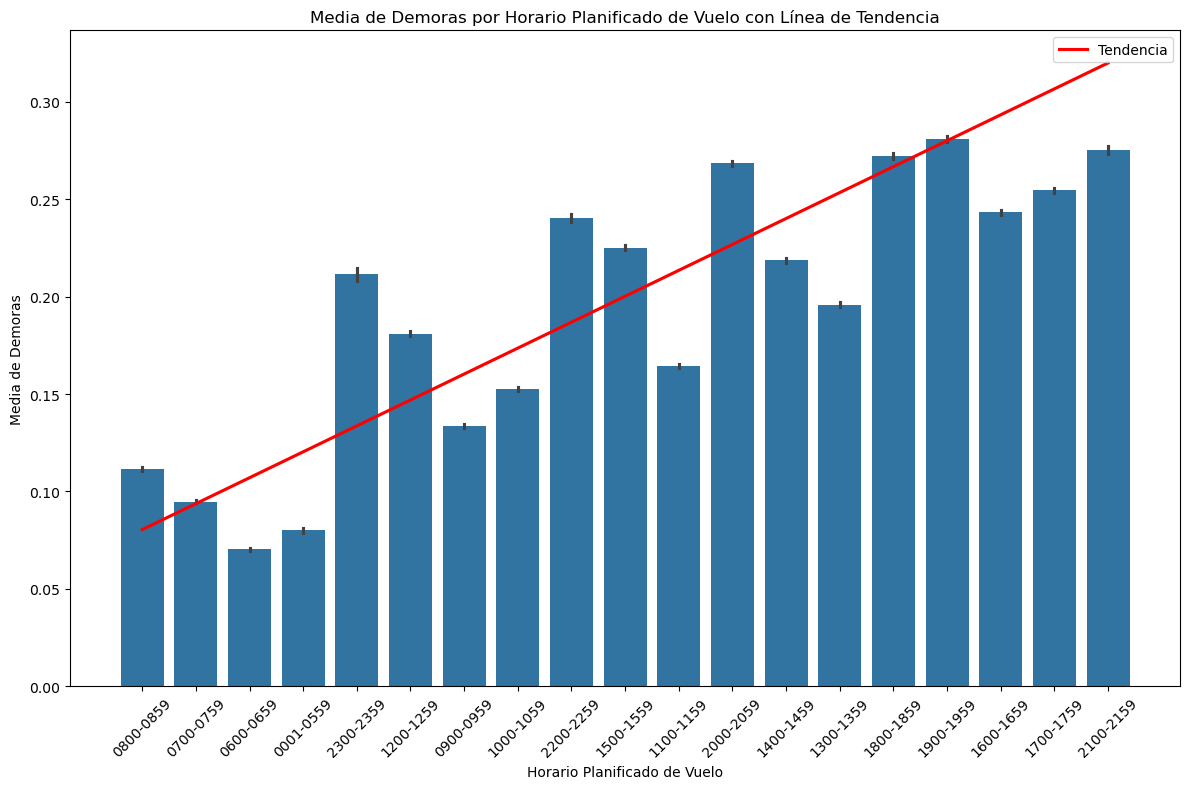

In [21]:
# Convertimos 'DEP_TIME_BLK' a valores numéricos para usar en la regresión
df['DEP_TIME_BLK_num'], _ = pd.factorize(df['DEP_TIME_BLK'], sort=True)

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='DEP_TIME_BLK', y='DEP_DEL15')

# Agregamos la línea de tendencia
sns.regplot(data=df, x='DEP_TIME_BLK_num', y='DEP_DEL15', scatter=False, color='red', label='Tendencia')

# Títulos y etiquetas
plt.title('Media de Demoras por Horario Planificado de Vuelo con Línea de Tendencia')
plt.xlabel('Horario Planificado de Vuelo')
plt.ylabel('Media de Demoras')
plt.xticks(rotation=45, ticks=range(len(df['DEP_TIME_BLK'].unique())), labels=df['DEP_TIME_BLK'].unique())
plt.legend()
plt.tight_layout()
plt.show()

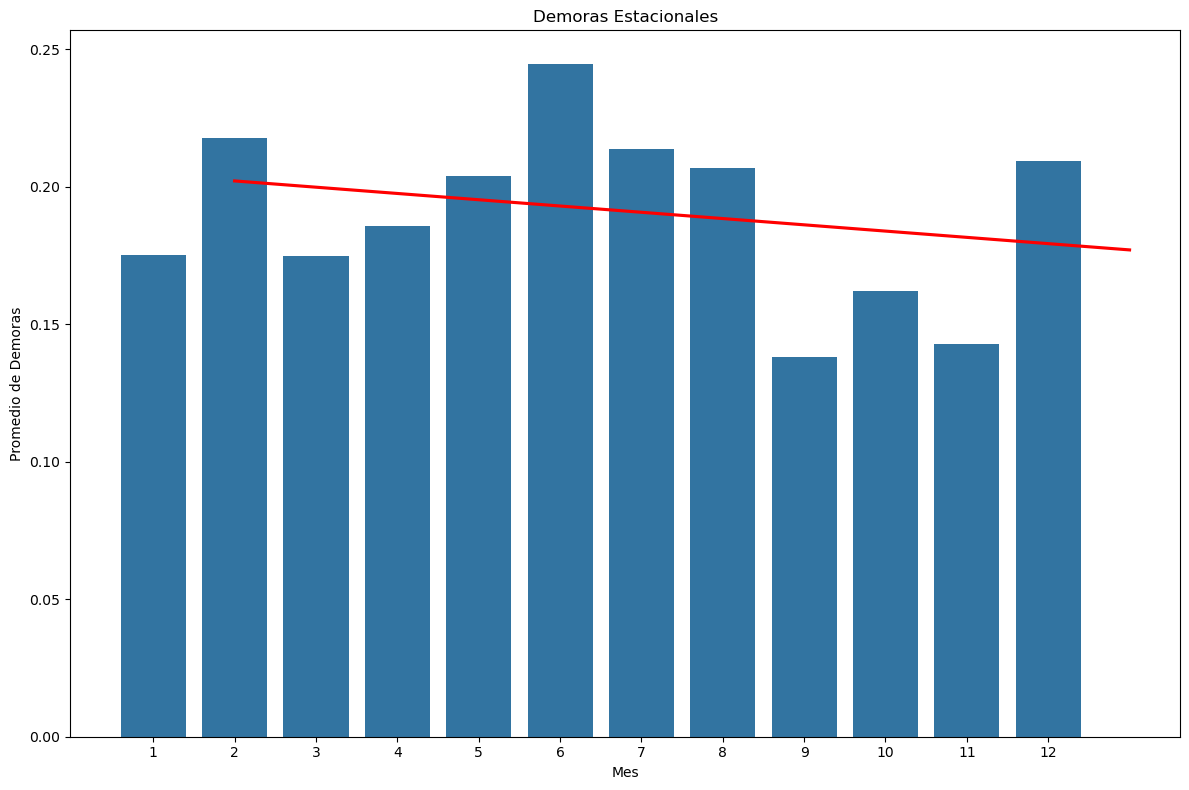

In [23]:
carrier_delays = df.groupby('MONTH')['DEP_DEL15'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Gráfico de barras
sns.barplot(data=carrier_delays, x='MONTH', y='DEP_DEL15')

# Agregar línea de tendencia con regplot
sns.regplot(data=carrier_delays, x='MONTH', y='DEP_DEL15', scatter=False, color='red', line_kws={"label": "Tendencia"}, ci=None)

# Personalización del gráfico
plt.title('Demoras Estacionales')
plt.xlabel('Mes')
plt.ylabel('Promedio de Demoras')
plt.tight_layout()

plt.show()

### HistPlot

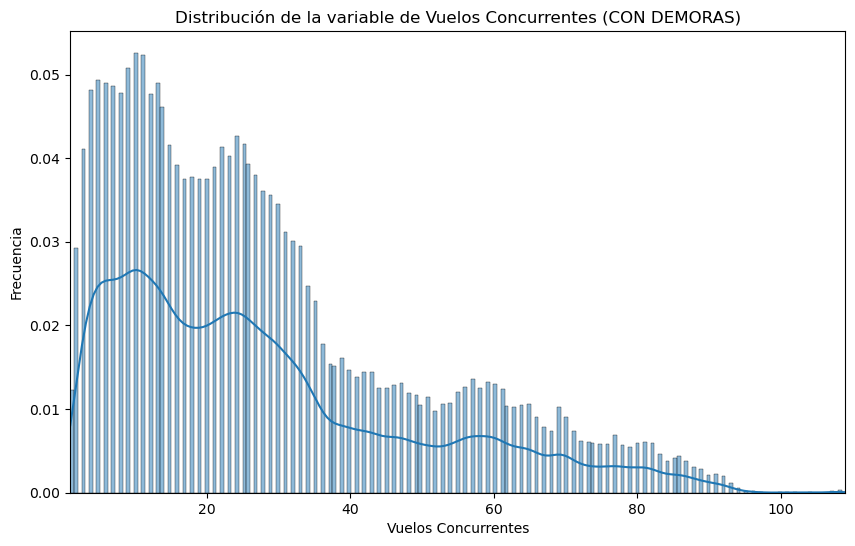

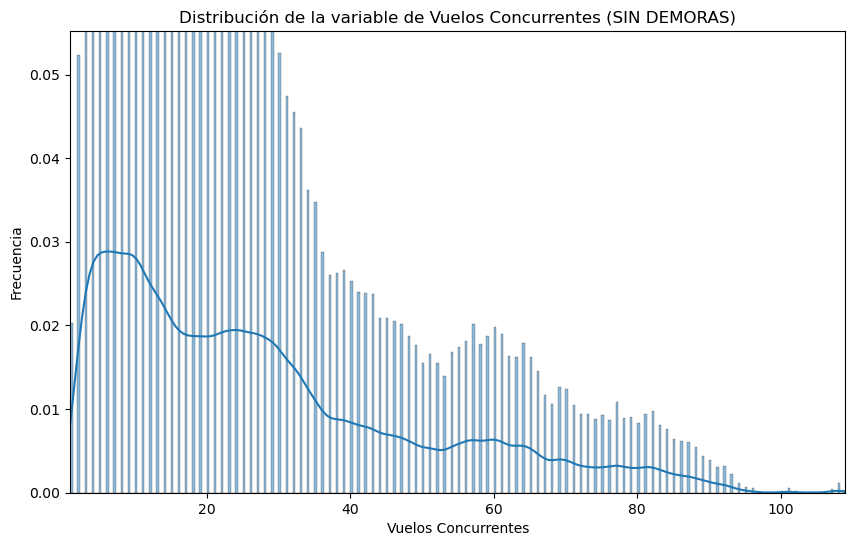

In [58]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['CONCURRENT_FLIGHTS'].min(), df_SD['CONCURRENT_FLIGHTS'].min())
max_x = max(df_CD['CONCURRENT_FLIGHTS'].max(), df_SD['CONCURRENT_FLIGHTS'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['CONCURRENT_FLIGHTS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['CONCURRENT_FLIGHTS'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (SIN DEMORAS)')
plt.show()

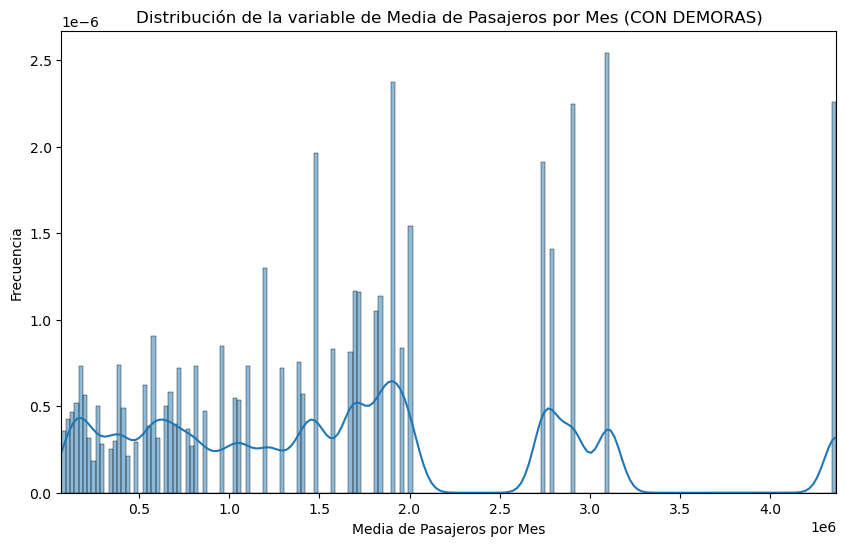

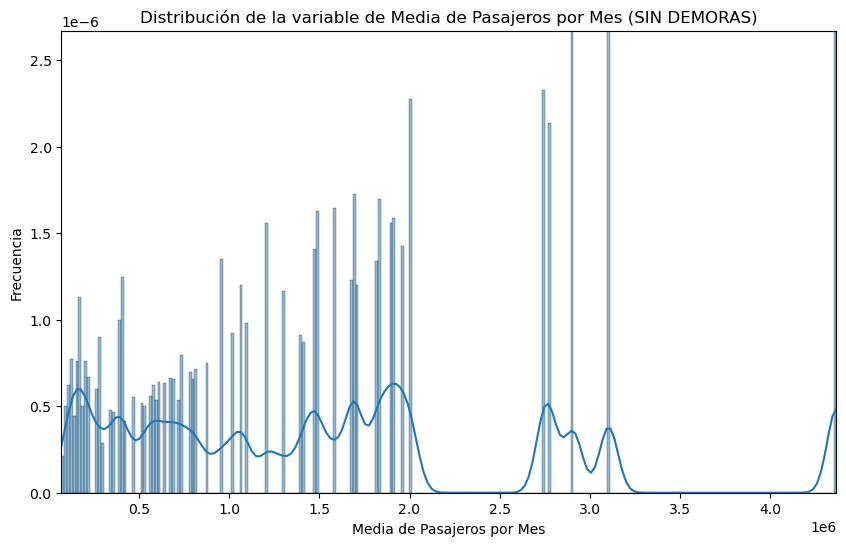

In [60]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['AVG_MONTHLY_PASS_AIRPORT'].min(), df_SD['AVG_MONTHLY_PASS_AIRPORT'].min())
max_x = max(df_CD['AVG_MONTHLY_PASS_AIRPORT'].max(), df_SD['AVG_MONTHLY_PASS_AIRPORT'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['AVG_MONTHLY_PASS_AIRPORT'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Media de Pasajeros por Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Media de Pasajeros por Mes (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['AVG_MONTHLY_PASS_AIRPORT'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Media de Pasajeros por Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Media de Pasajeros por Mes (SIN DEMORAS)')
plt.show()

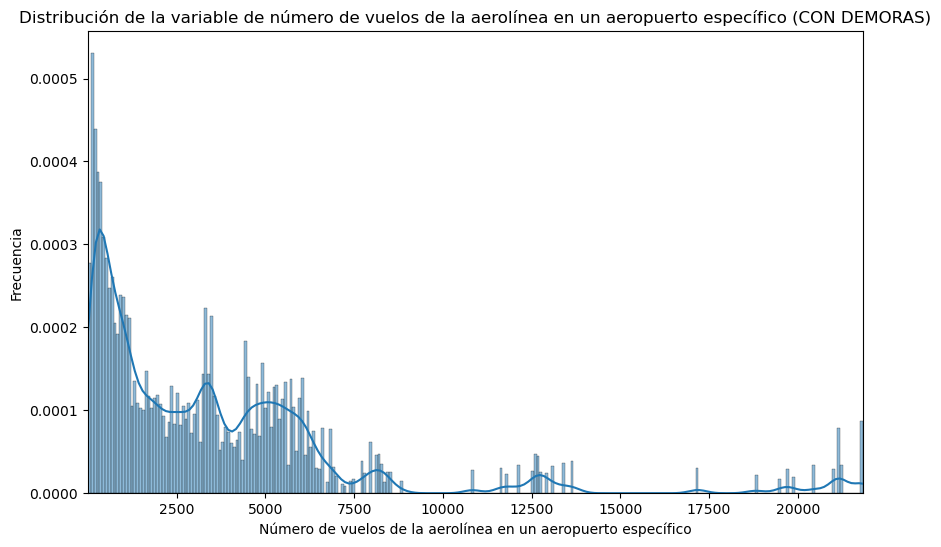

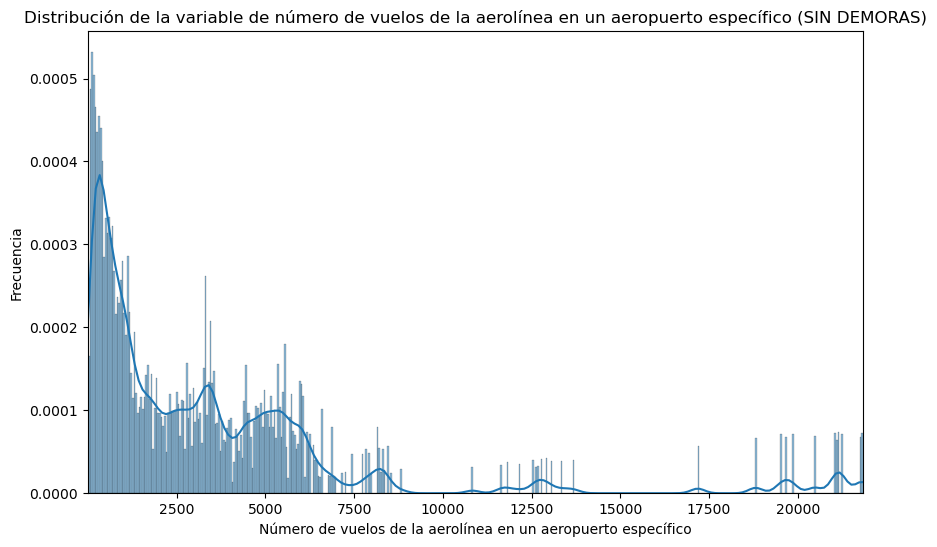

In [62]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].min(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].min())
max_x = max(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].max(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (SIN DEMORAS)')
plt.show()

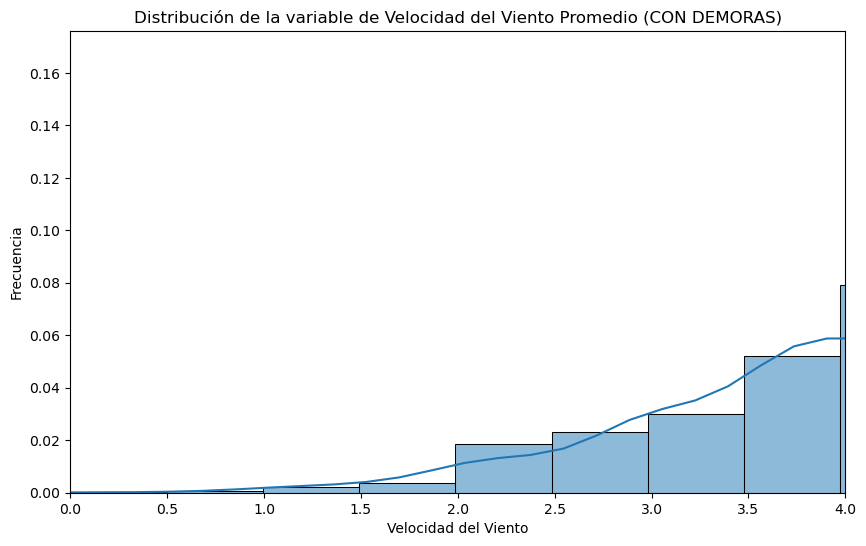

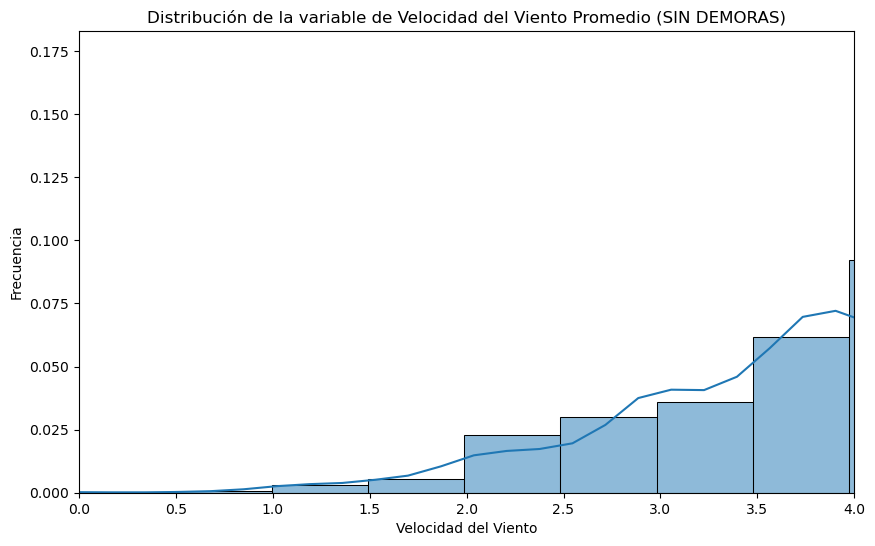

In [64]:
# Filtrar por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_CD['AWND'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Velocidad del Viento Promedio (CON DEMORAS)')
plt.xlim(0, 4)
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_SD['AWND'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Velocidad del Viento Promedio (SIN DEMORAS)')
plt.xlim(0, 4)
plt.show()

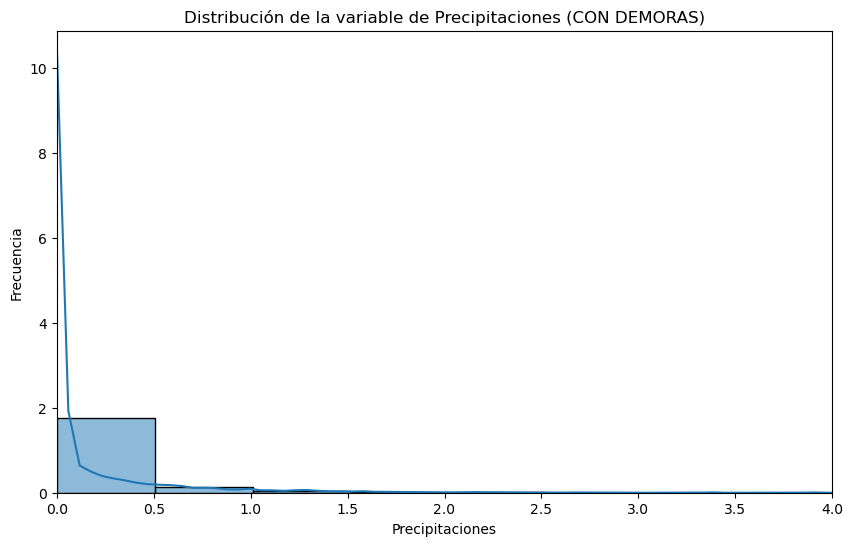

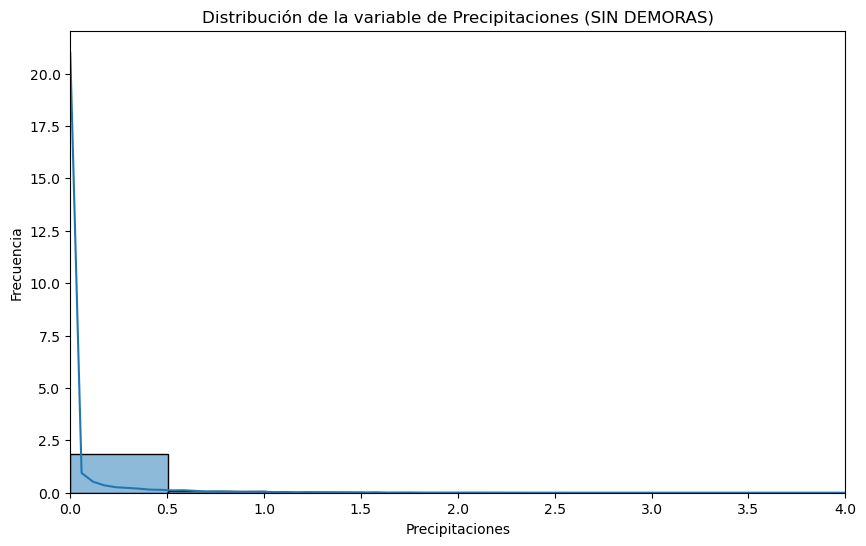

In [68]:
# Filtrar por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_CD['PRCP'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Precipitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Precipitaciones (CON DEMORAS)')
plt.xlim(0, 4)
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
sns.histplot(df_SD['PRCP'], kde=True, binwidth=0.5, stat='density')
plt.xlabel('Precipitaciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Precipitaciones (SIN DEMORAS)')
plt.xlim(0, 4)
plt.show()

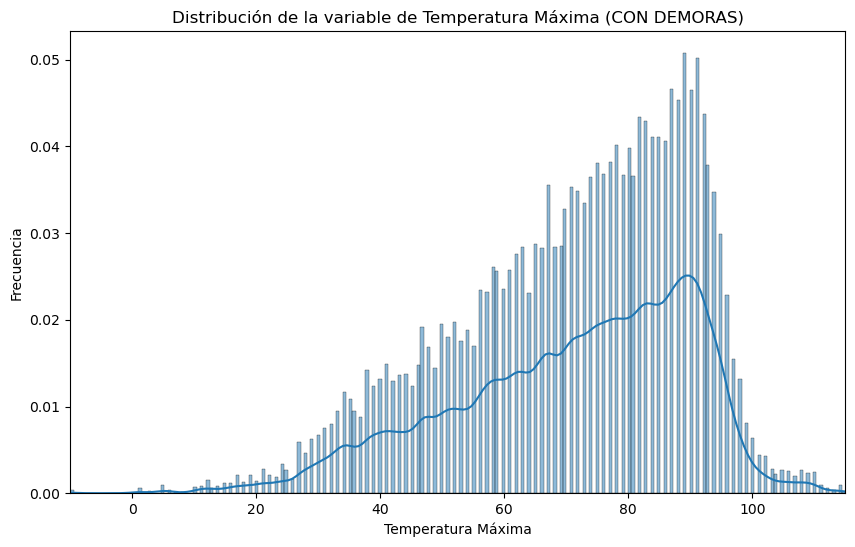

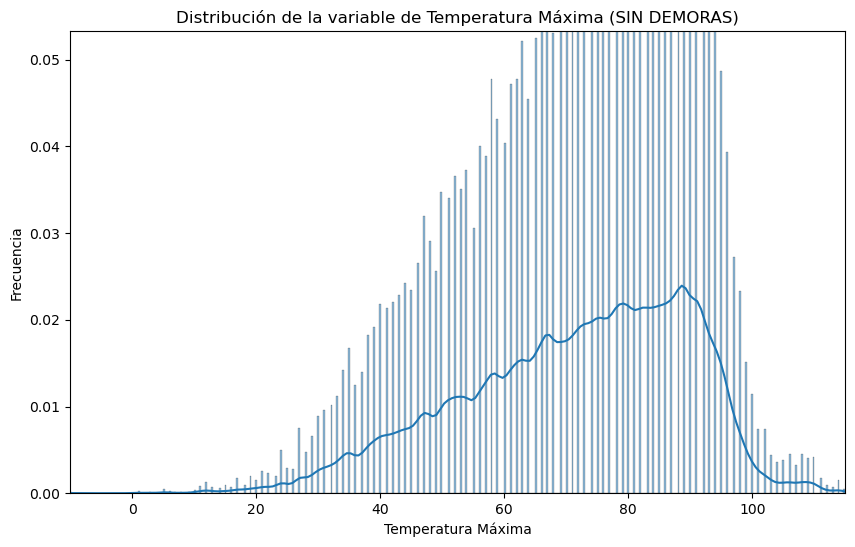

In [70]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['TMAX'].min(), df_SD['TMAX'].min())
max_x = max(df_CD['TMAX'].max(), df_SD['TMAX'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['TMAX'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['TMAX'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (SIN DEMORAS)')
plt.show()

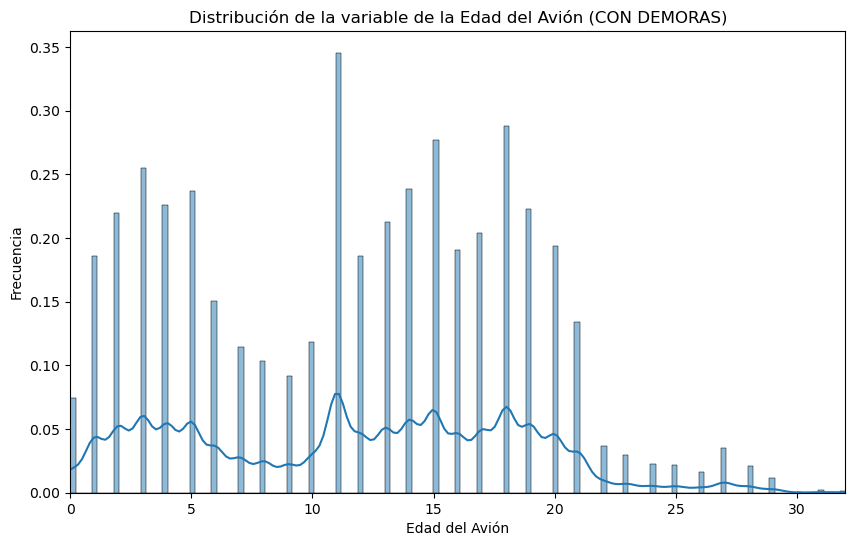

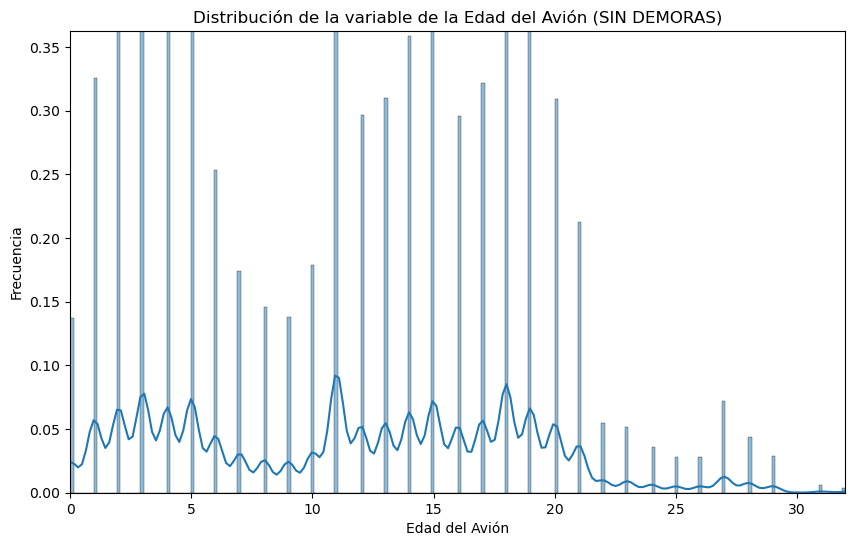

In [73]:
# Filtramos por con y sin demora
df_CD = df[df['DEP_DEL15'] == 1]
df_SD = df[df['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['PLANE_AGE'].min(), df_SD['PLANE_AGE'].min())
max_x = max(df_CD['PLANE_AGE'].max(), df_SD['PLANE_AGE'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['PLANE_AGE'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Edad del Avión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de la Edad del Avión (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['PLANE_AGE'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Edad del Avión')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de la Edad del Avión (SIN DEMORAS)')
plt.show()

### BoxPlot

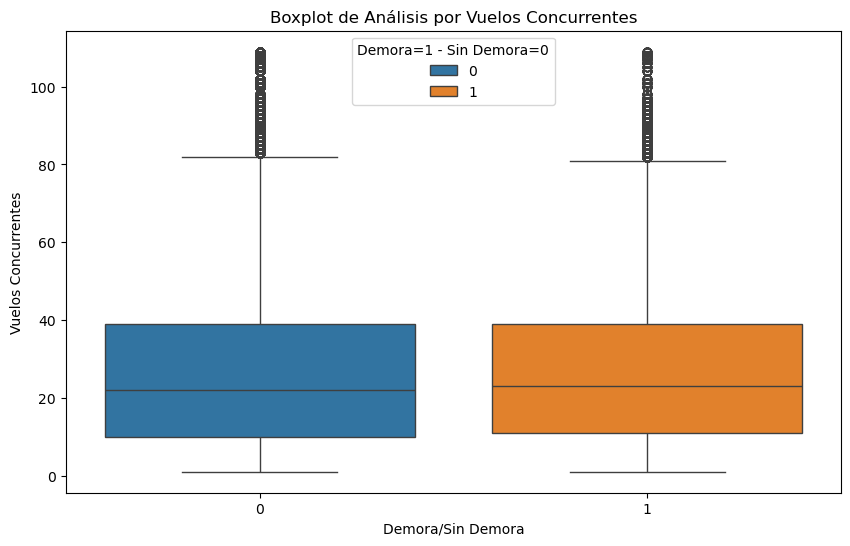

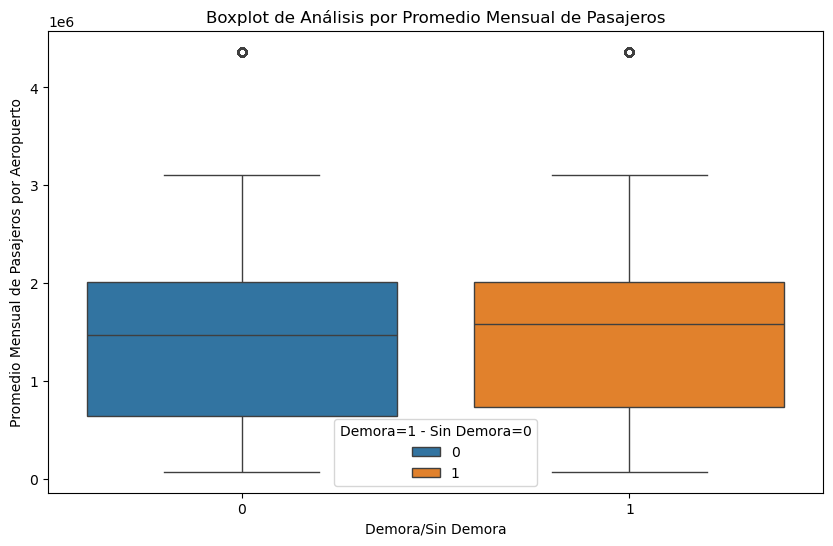

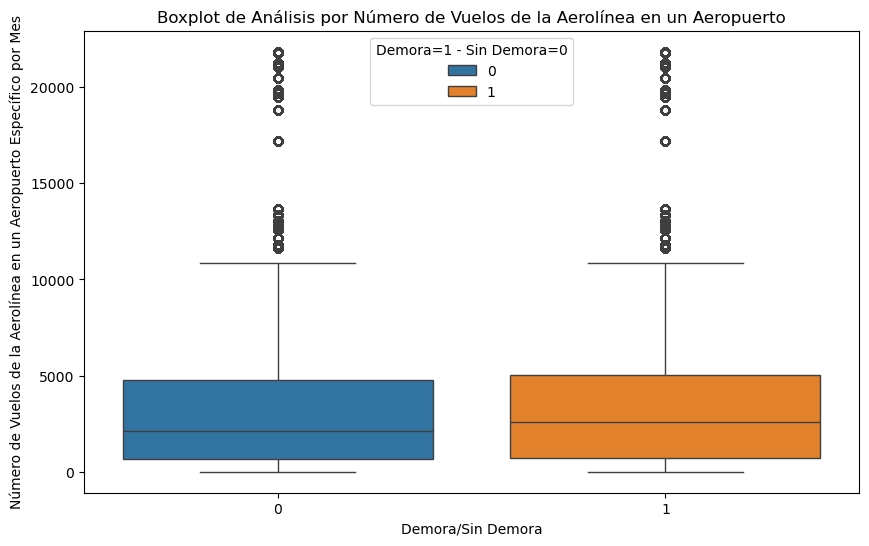

In [43]:
#Por número de vuelos que se realizan concurrentemente
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.CONCURRENT_FLIGHTS, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Vuelos Concurrentes')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Vuelos Concurrentes')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Promedio Mensual de Pasajeros que pasan por el Aeropuerto
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AVG_MONTHLY_PASS_AIRPORT, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Promedio Mensual de Pasajeros')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Promedio Mensual de Pasajeros por Aeropuerto')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por número de vuelos que se realizan concurrentemente
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AIRLINE_AIRPORT_FLIGHTS_MONTH, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Número de Vuelos de la Aerolínea en un Aeropuerto')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Número de Vuelos de la Aerolínea en un Aeropuerto Específico por Mes')
plt.legend(title='Demora=1 - Sin Demora=0')

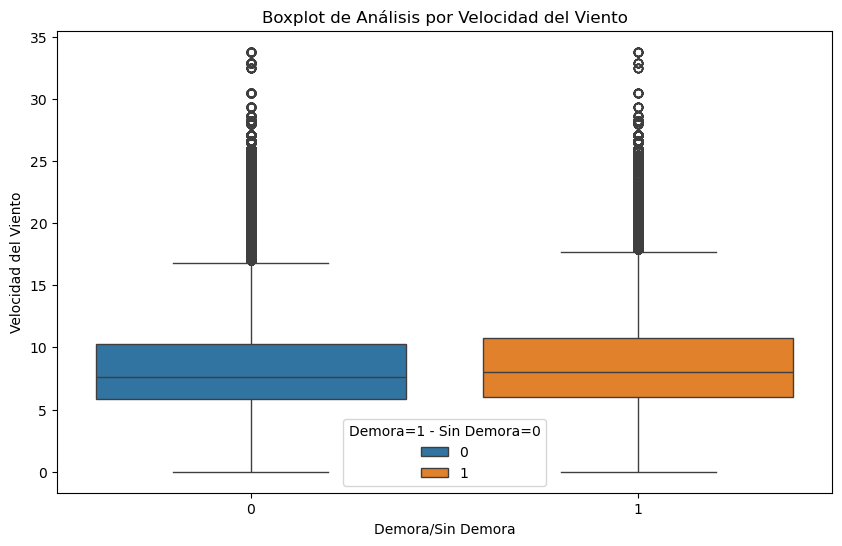

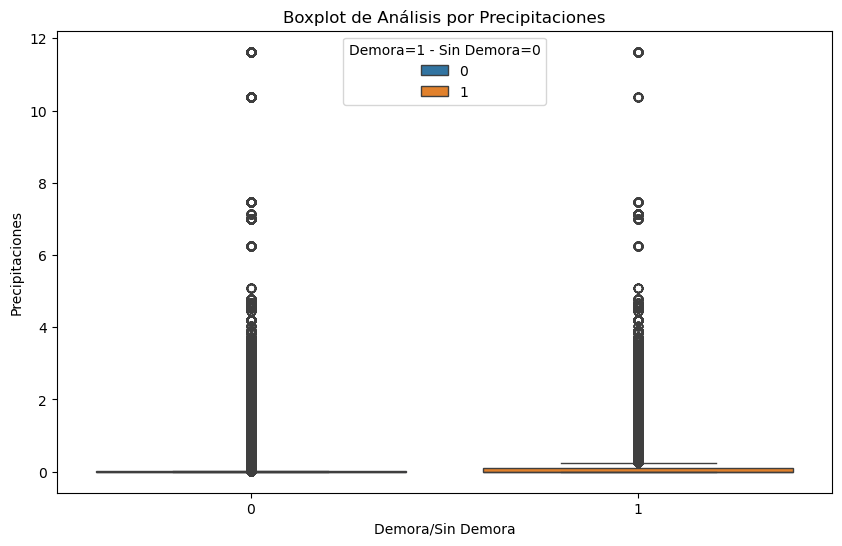

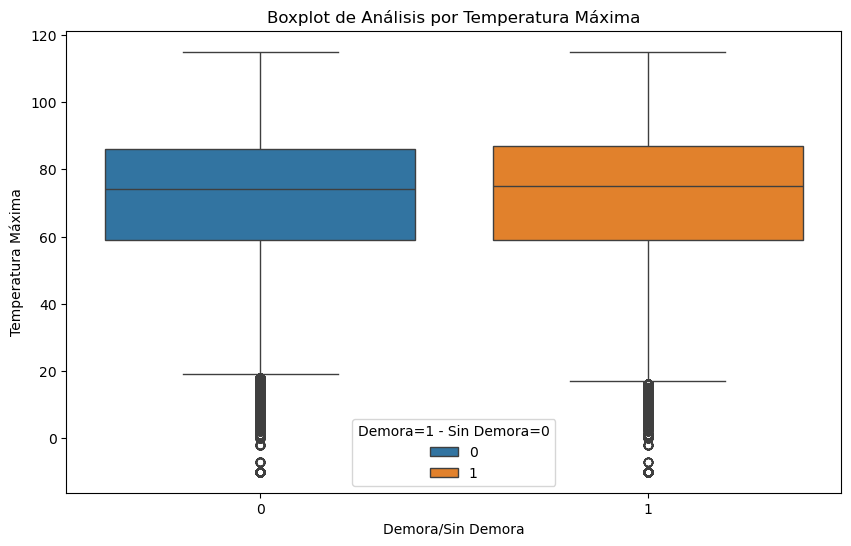

In [45]:
#Por Velocidad del Viento
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AWND, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Velocidad del Viento')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Velocidad del Viento')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Precipitaciones
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.PRCP, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Precipitaciones')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Precipitaciones')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Temperatura Máxima
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.TMAX, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Temperatura Máxima')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Temperatura Máxima')
plt.legend(title='Demora=1 - Sin Demora=0')

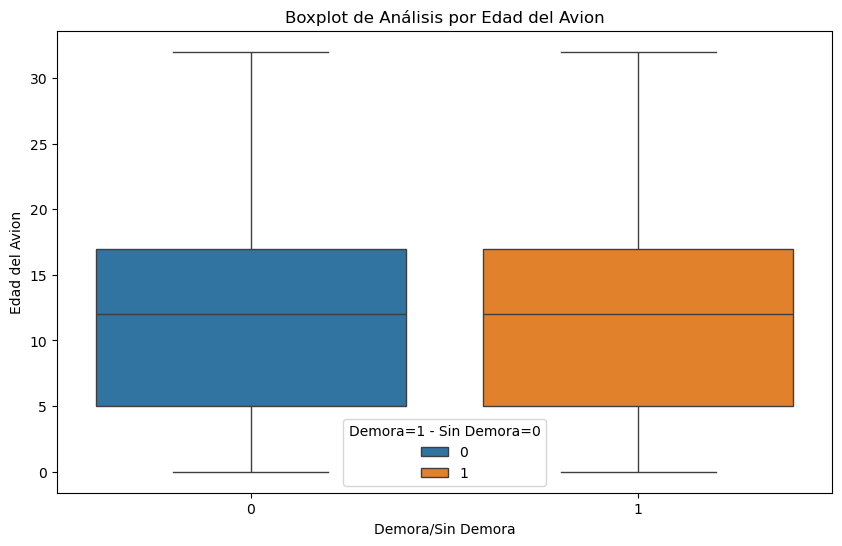

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.PLANE_AGE, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Edad del Avion')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Edad del Avion')
plt.legend(title='Demora=1 - Sin Demora=0')

### ScatterPlot

In [39]:
df_continuous = df[continuous_columns + ['DEP_DEL15']]
df_continuous

CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
0                        25              143                  13056   
1                        29              191                  13056   
2                        27              199                  13056   
3                        27              180                  13056   
4                        10              182                  13056   
...                     ...              ...                    ...   
6460584                   3              123                   1318   
6460585                   2              123                   1318   
6460586                   2              123                   1318   
6460587                   3              123                   1318   
6460588                   3              123                   1318   

         AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  \
0                       107363                           5873   
1                        73508                           1174   
2                        73508                           1174   
3                        73508                           1174   
4                        15023                           1257   
...                        ...                            ...   
6460584                   7268                            757   
6460585                   7268                            757   
6460586                   7268                            757   
6460587                   7268                            757   
6460588                   7268                            757   

         AVG_MONTHLY_PASS_AIRPORT  FLT_ATTENDANTS_PER_PASS  \
0                         1903352                 0.000062   
1                         1903352                 0.000144   
2                         1903352                 0.000144   
3                         1903352                 0.000144   
4                         1903352                 0.000009   
...                           ...                      ...   
6460584                    133573                 0.000120   
6460585                    133573                 0.000120   
6460586                    133573                 0.000120   
6460587                    133573                 0.000120   
6460588                    133573                 0.000120   

         GROUND_SERV_PER_PASS  PLANE_AGE  LATITUDE  LONGITUDE  PRCP  SNOW  \
0                    0.000099          8    36.080   -115.152  0.00   0.0   
1                    0.000149          3    36.080   -115.152  0.00   0.0   
2                    0.000149         18    36.080   -115.152  0.00   0.0   
3                    0.000149          2    36.080   -115.152  0.00   0.0   
4                    0.000125          1    36.080   -115.152  0.00   0.0   
...                       ...        ...       ...        ...   ...   ...   
6460584              0.000198         18    21.979   -159.346  0.06   0.0   
6460585              0.000198         16    21.979   -159.346  0.06   0.0   
6460586              0.000198         18    21.979   -159.346  0.06   0.0   
6460587              0.000198         18    21.979   -159.346  0.06   0.0   
6460588              0.000198         15    21.979   -159.346  0.06   0.0   

         SNWD  TMAX   AWND  DEP_DEL15  
0         0.0  65.0   2.91          0  
1         0.0  65.0   2.91          0  
2         0.0  65.0   2.91          0  
3         0.0  65.0   2.91          0  
4         0.0  65.0   2.91          0  
...       ...   ...    ...        ...  
6460584   0.0  84.0  15.21          0  
6460585   0.0  84.0  15.21          0  
6460586   0.0  84.0  15.21          0  
6460587   0.0  84.0  15.21          0  
6460588   0.0  84.0  15.21          1  

[6460589 rows x 17 columns]

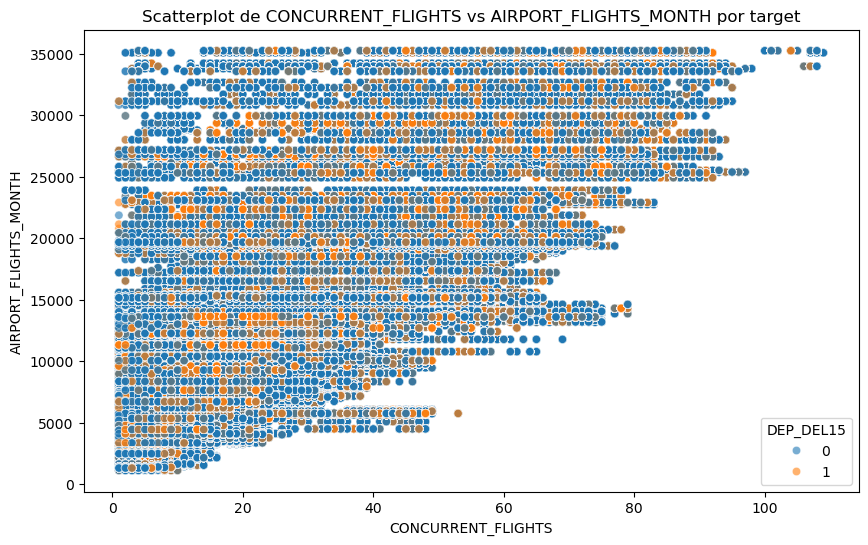

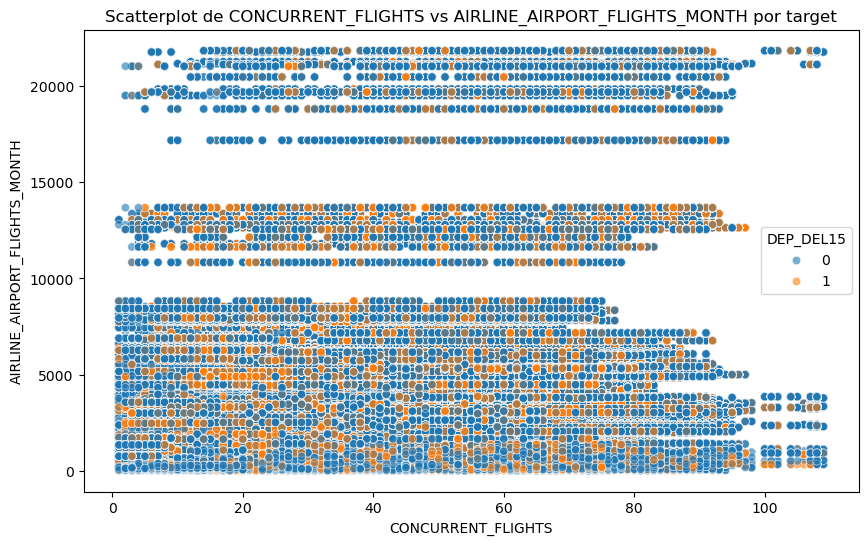

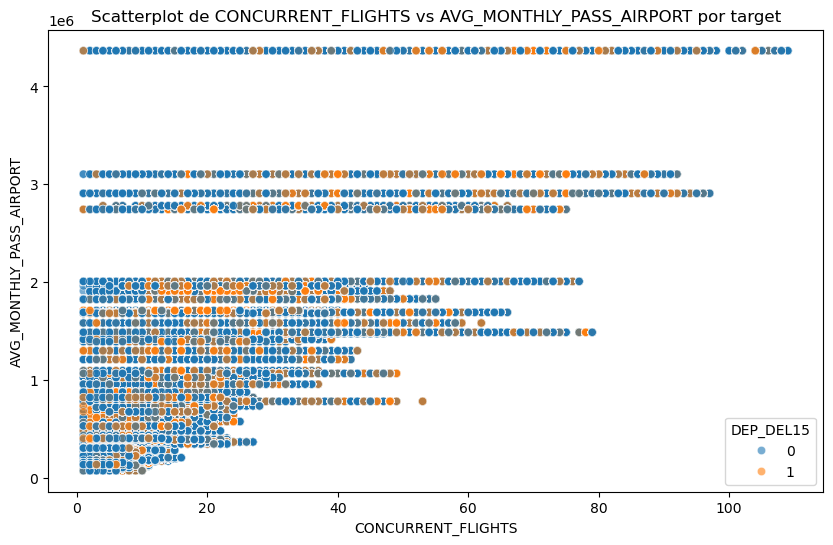

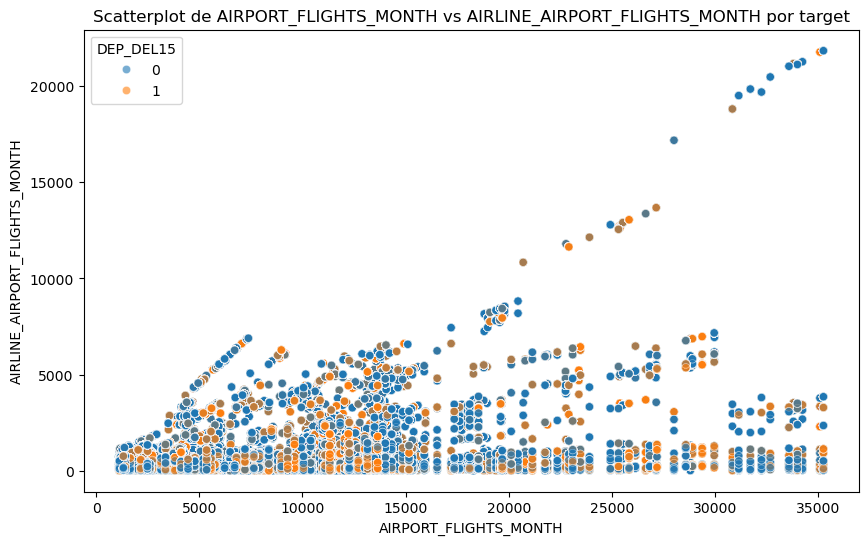

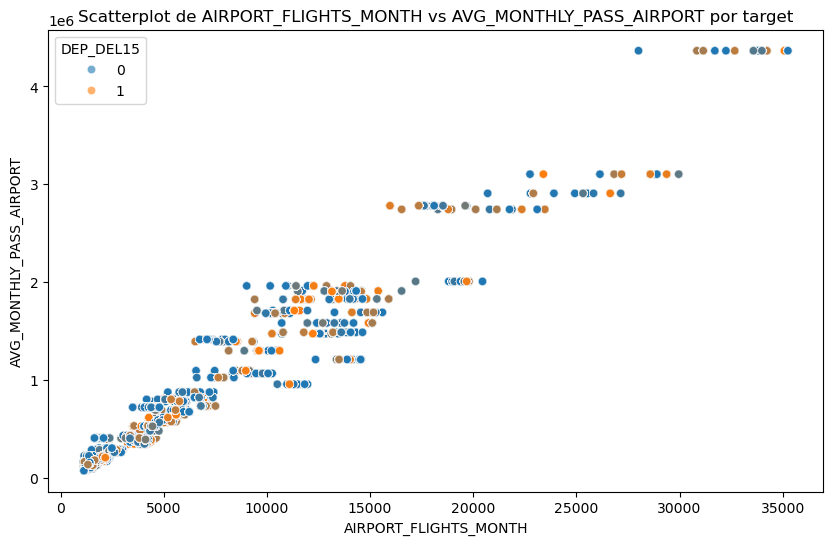

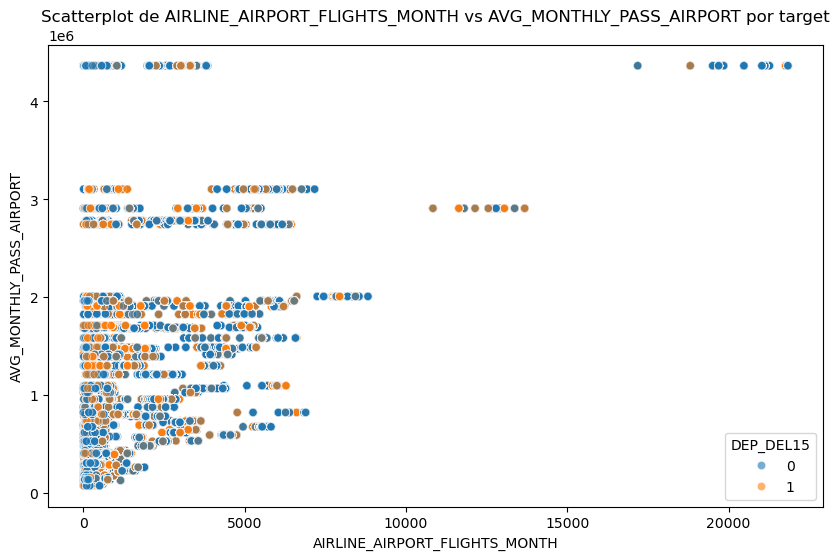

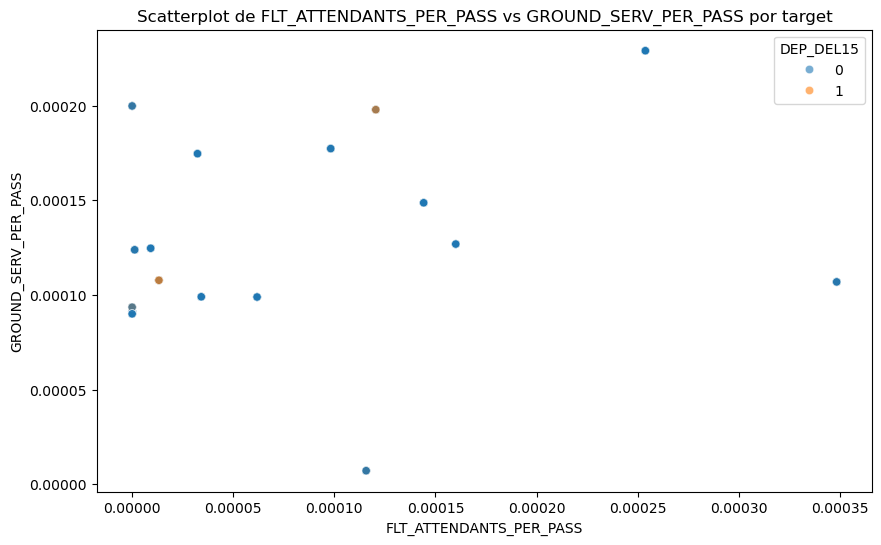

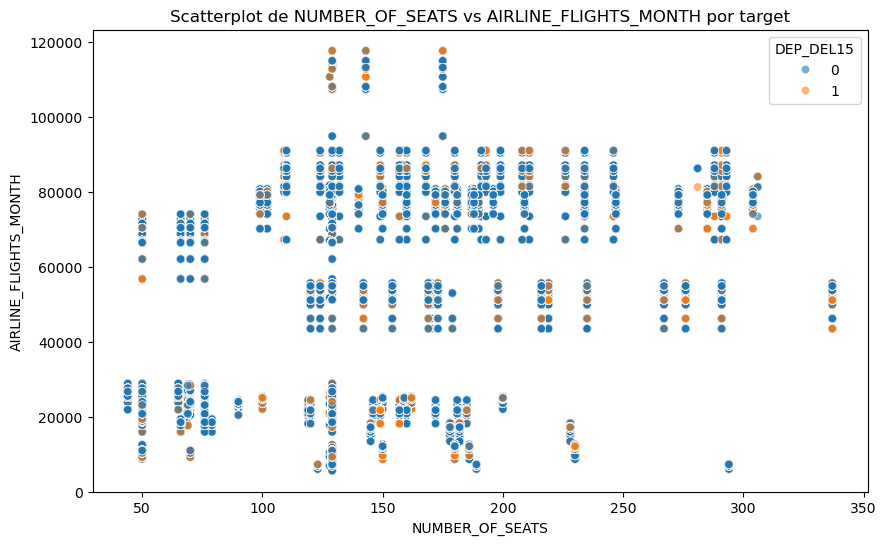

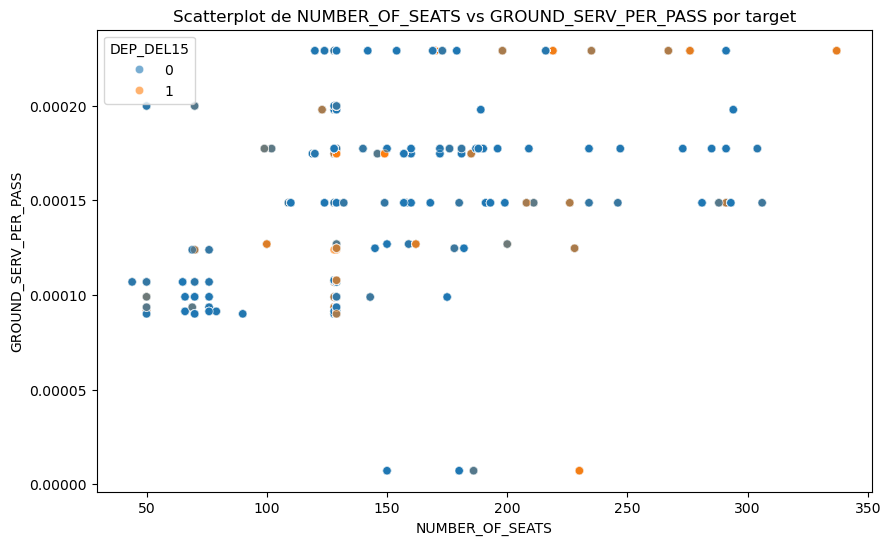

In [41]:
variables_to_compare = [("CONCURRENT_FLIGHTS","AIRPORT_FLIGHTS_MONTH"), ("CONCURRENT_FLIGHTS","AIRLINE_AIRPORT_FLIGHTS_MONTH"), 
                        ("CONCURRENT_FLIGHTS","AVG_MONTHLY_PASS_AIRPORT"), ("AIRPORT_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH"),
                       ("AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT"), ("AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT"),
                       ("FLT_ATTENDANTS_PER_PASS","GROUND_SERV_PER_PASS"), ("NUMBER_OF_SEATS","AIRLINE_FLIGHTS_MONTH"),
                       ("NUMBER_OF_SEATS","GROUND_SERV_PER_PASS")]
for x_var, y_var in variables_to_compare:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x = x_var, y = y_var, hue="DEP_DEL15", data=df_continuous, alpha=0.6)
    plt.title(f"Scatterplot de {x_var} vs {y_var} por target")
    plt.show()

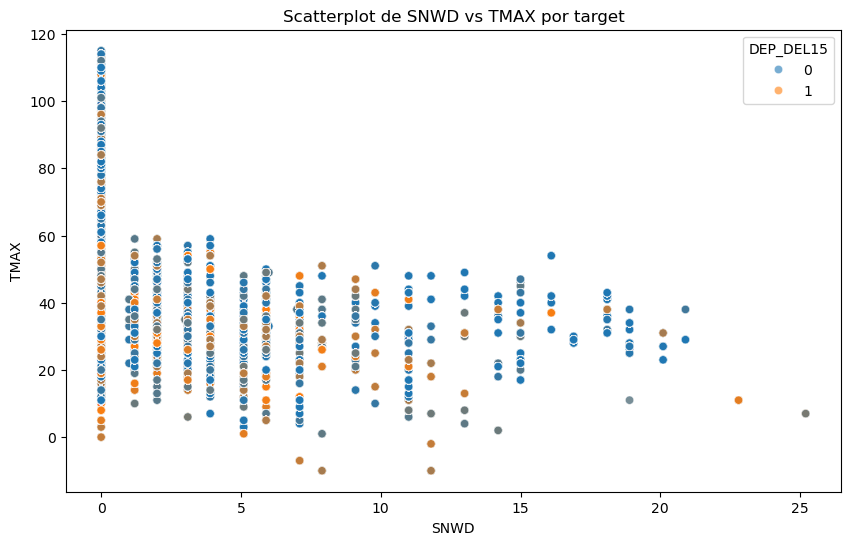

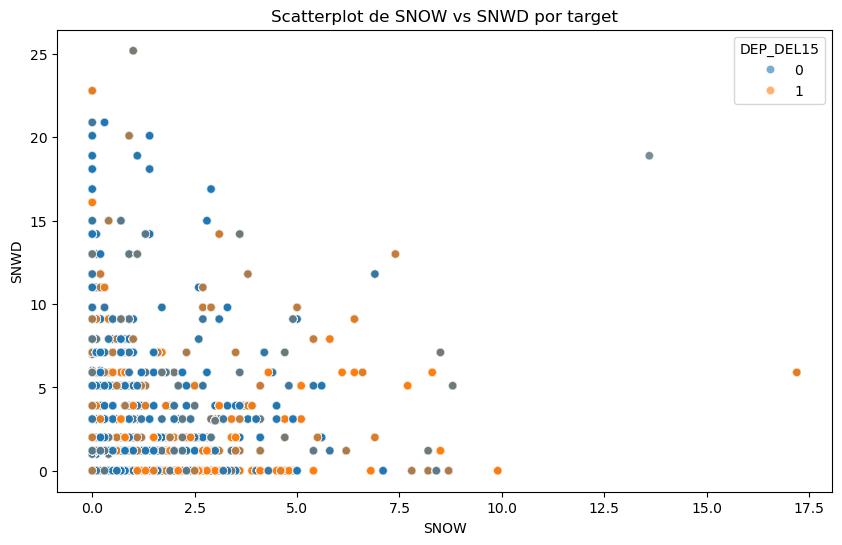

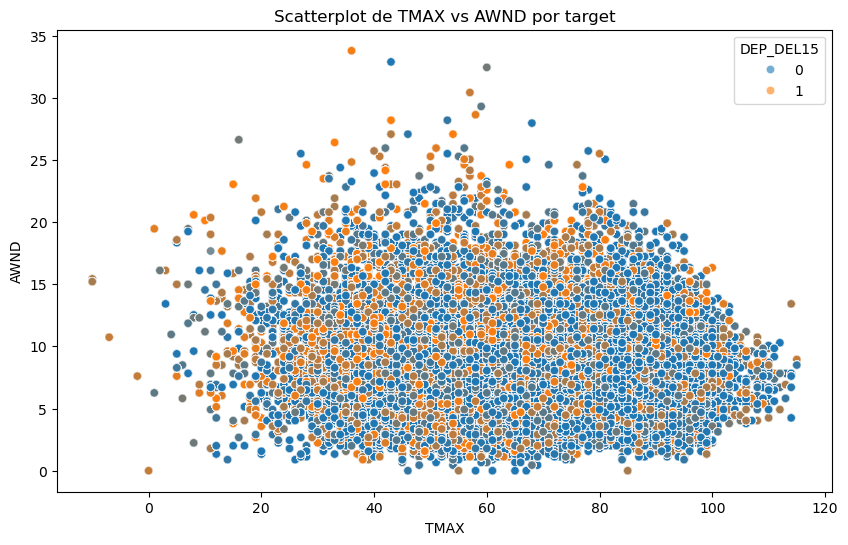

In [27]:
variables_to_compare = [("SNWD","TMAX"), ("SNOW","SNWD"), ("TMAX","AWND")]
for x_var, y_var in variables_to_compare:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=x_var, y = y_var, hue="DEP_DEL15", data=df, alpha=0.6)
    plt.title(f"Scatterplot de {x_var} vs {y_var} por target")
    plt.show()

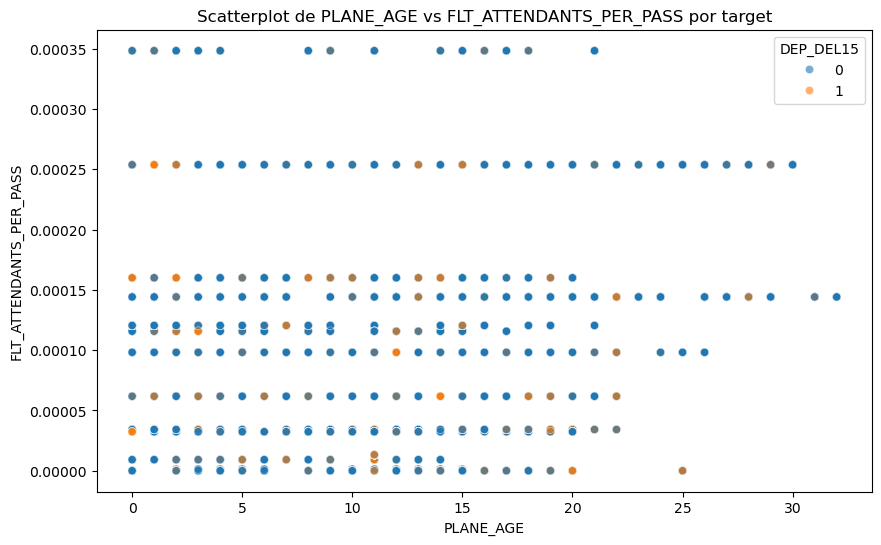

In [25]:
variables_to_compare = [("PLANE_AGE","FLT_ATTENDANTS_PER_PASS")]
for x_var, y_var in variables_to_compare:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=x_var, y = y_var, hue="DEP_DEL15", data=df, alpha=0.6)
    plt.title(f"Scatterplot de {x_var} vs {y_var} por target")
    plt.show()

### CorPlot

In [82]:
df_continuous = df[continuous_columns]
correlaciones_de_pearson = df_continuous.corr()
correlaciones_de_pearson

CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
CONCURRENT_FLIGHTS                       1.000000        -0.054551   
NUMBER_OF_SEATS                         -0.054551         1.000000   
AIRPORT_FLIGHTS_MONTH                    0.849312         0.002710   
AIRLINE_FLIGHTS_MONTH                   -0.043745         0.308198   
AIRLINE_AIRPORT_FLIGHTS_MONTH            0.582961         0.161231   
AVG_MONTHLY_PASS_AIRPORT                 0.809028         0.062546   
FLT_ATTENDANTS_PER_PASS                  0.122566         0.204307   
GROUND_SERV_PER_PASS                     0.103832         0.344076   
PLANE_AGE                                0.036755        -0.102950   
LATITUDE                                 0.016870        -0.136980   
LONGITUDE                                0.117106        -0.162838   
PRCP                                    -0.015240        -0.014073   
SNOW                                    -0.017315        -0.008560   
SNWD                                    -0.027394        -0.015742   
TMAX                                     0.026096         0.061315   
AWND                                     0.059150        -0.018673   

                               AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
CONCURRENT_FLIGHTS                          0.849312              -0.043745   
NUMBER_OF_SEATS                             0.002710               0.308198   
AIRPORT_FLIGHTS_MONTH                       1.000000              -0.020906   
AIRLINE_FLIGHTS_MONTH                      -0.020906               1.000000   
AIRLINE_AIRPORT_FLIGHTS_MONTH               0.648066               0.230713   
AVG_MONTHLY_PASS_AIRPORT                    0.967898              -0.010561   
FLT_ATTENDANTS_PER_PASS                     0.147918               0.002133   
GROUND_SERV_PER_PASS                        0.107982              -0.065807   
PLANE_AGE                                   0.027938               0.171819   
LATITUDE                                    0.017793              -0.030082   
LONGITUDE                                   0.089757              -0.083793   
PRCP                                       -0.010567              -0.008308   
SNOW                                       -0.009936              -0.013065   
SNWD                                       -0.032789              -0.024554   
TMAX                                        0.038898               0.077206   
AWND                                        0.071548              -0.047443   

                               AIRLINE_AIRPORT_FLIGHTS_MONTH  \
CONCURRENT_FLIGHTS                                  0.582961   
NUMBER_OF_SEATS                                     0.161231   
AIRPORT_FLIGHTS_MONTH                               0.648066   
AIRLINE_FLIGHTS_MONTH                               0.230713   
AIRLINE_AIRPORT_FLIGHTS_MONTH                       1.000000   
AVG_MONTHLY_PASS_AIRPORT                            0.643154   
FLT_ATTENDANTS_PER_PASS                             0.142327   
GROUND_SERV_PER_PASS                                0.131499   
PLANE_AGE                                           0.116365   
LATITUDE                                           -0.067174   
LONGITUDE                                           0.071580   
PRCP                                               -0.000985   
SNOW                                               -0.019784   
SNWD                                               -0.032849   
TMAX                                                0.067945   
AWND                                                0.008001   

                               AVG_MONTHLY_PASS_AIRPORT  \
CONCURRENT_FLIGHTS                             0.809028   
NUMBER_OF_SEATS                                0.062546   
AIRPORT_FLIGHTS_MONTH                          0.967898   
AIRLINE_FLIGHTS_MONTH                         -0.010561   
AIRLINE_AIRPORT_FLIGHTS_MONTH                  0.643154   
AVG_MONTHLY_PASS_AIRPORT                       1.0000

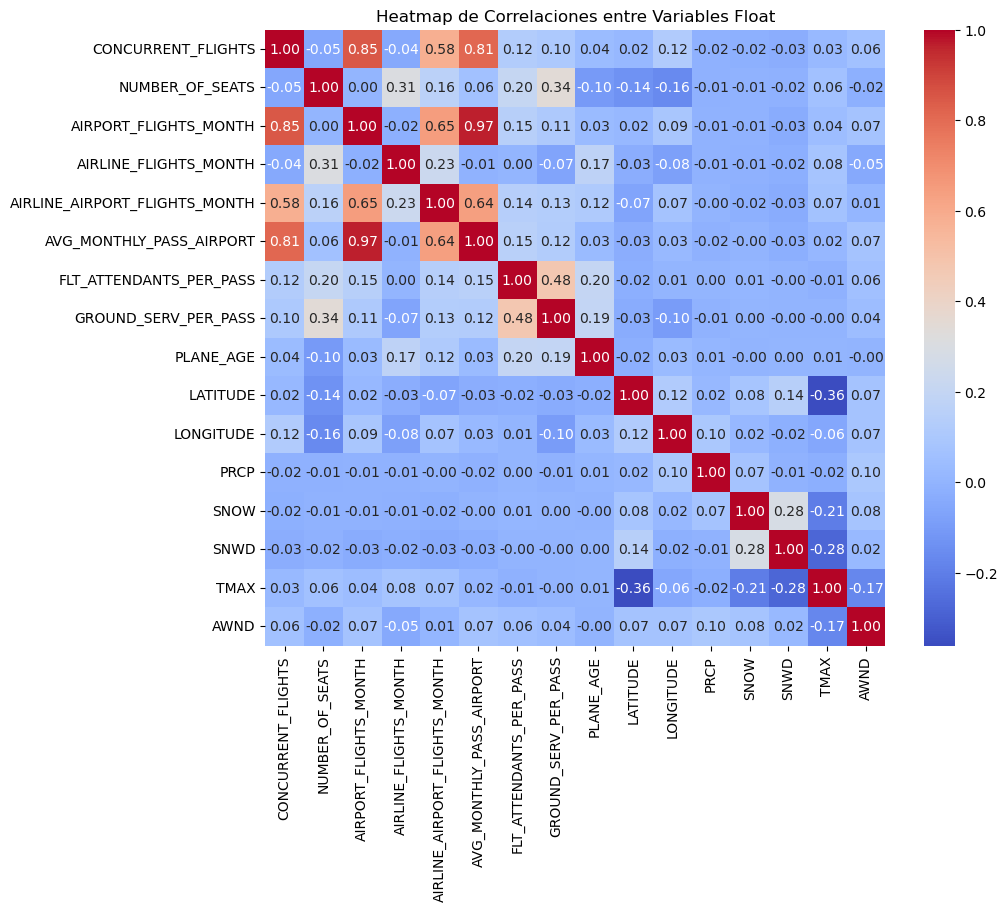

In [84]:
# Generar el heatmap por coeficiente de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones_de_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlaciones entre Variables Float')
plt.show()

### Trabajo con Outliers

In [15]:
#Bucle For para hacer un reemplazo de los Outliers por la media u otro valor

for col in continuous_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 -  Q1

    lower_bound = Q1 - 1.75 * IQR 
    upper_bound = Q3 + 1.75 * IQR
    
    col_mean = df[col].mean()

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = col_mean

In [24]:
#Rápido control de que no se afecto al dataset implicado.
df

Unnamed: 0  MONTH  DAY_OF_WEEK  DEP_DEL15 DEP_TIME_BLK  \
0                 0      1            7          0    0800-0859   
1                 1      1            7          0    0700-0759   
2                 2      1            7          0    0600-0659   
3                 3      1            7          0    0600-0659   
4                 4      1            7          0    0001-0559   
...             ...    ...          ...        ...          ...   
6460584     6489057     12            7          0    2300-2359   
6460585     6489058     12            7          0    1800-1859   
6460586     6489059     12            7          0    2000-2059   
6460587     6489060     12            7          0    2100-2159   
6460588     6489061     12            7          1    2100-2159   

         DISTANCE_GROUP  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0                     2               1                25.0            143.0   
1                     7               1                29.0            191.0   
2                     7               1                27.0            199.0   
3                     9               1                27.0            180.0   
4                     7               1                10.0            182.0   
...                 ...             ...                 ...              ...   
6460584               1              11                 3.0            123.0   
6460585               1              11                 2.0            123.0   
6460586               1              11                 2.0            123.0   
6460587               1              12                 3.0            123.0   
6460588               1              12                 3.0            123.0   

                   CARRIER_NAME  ...  PLANE_AGE       DEPARTING_AIRPORT  \
0        Southwest Airlines Co.  ...        8.0  McCarran International   
1          Delta Air Lines Inc.  ...        3.0  McCarran International   
2          Delta Air Lines Inc.  ...       18.0  McCarran International   
3          Delta Air Lines Inc.  ...        2.0  McCarran International   
4              Spirit Air Lines  ...        1.0  McCarran International   
...                         ...  ...        ...                     ...   
6460584  Hawaiian Airlines Inc.  ...       18.0           Lihue Airport   
6460585  Hawaiian Airlines Inc.  ...       16.0           Lihue Airport   
6460586  Hawaiian Airlines Inc.  ...       18.0           Lihue Airport   
6460587  Hawaiian Airlines Inc.  ...       18.0           Lihue Airport   
6460588  Hawaiian Airlines Inc.  ...       15.0           Lihue Airport   

         LATITUDE   LONGITUDE        PREVIOUS_AIRPORT      PRCP  SNOW  SNWD  \
0          36.080 -115.152000                    NONE  0.000000   0.0   0.0   
1          36.080 -115.152000                    NONE  0.000000   0.0   0.0   
2          36.080 -115.152000                    NONE  0.000000   0.0   0.0   
3          36.080 -115.152000                    NONE  0.000000   0.0   0.0   
4          36.080 -115.152000                    NONE  0.000000   0.0   0.0   
...           ...         ...                     ...       ...   ...   ...   
6460584    21.979  -94.217914  Honolulu International  0.023773   0.0   0.0   
6460585    21.979  -94.217914  Honolulu International  0.023773   0.0   0.0   
6460586    21.979  -94.217914  Honolulu International  0.023773   0.0   0.0   
6460587    21.979  -94.217914  Honolulu International  0.023773   0.0   0.0   
6460588    21.979  -94.217914  Honolulu International  0.023773   0.0   0.0   

         TMAX   AWND  
0        65.0   2.91  
1        65.0   2.91  
2        65.0   2.91  
3        65.0   2.91  
4        65.0   2.91  
...       ...    ...  
6460584  84.0  15.21  
6460585  84.0  15.21  
6460586  84.0  15.21  
6460587  84.0  15.21  
6460588  84.0  15.21  

[6460589 rows x 27 columns]

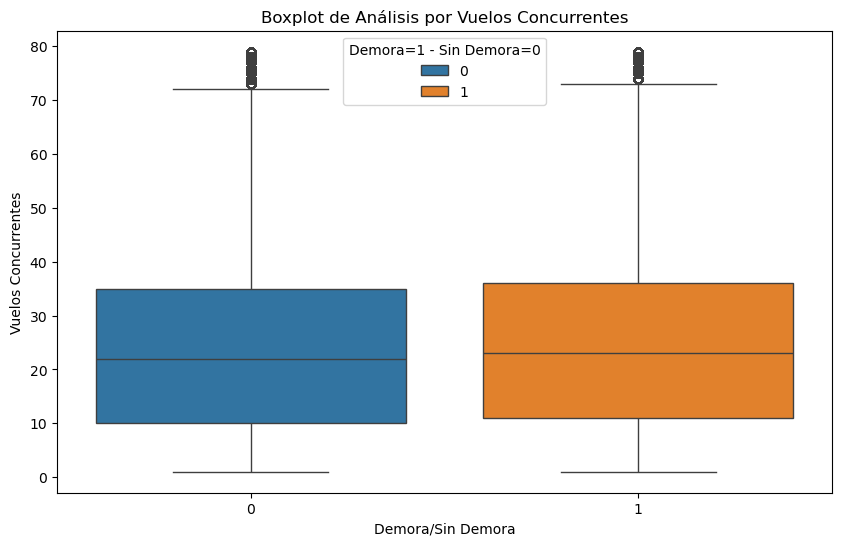

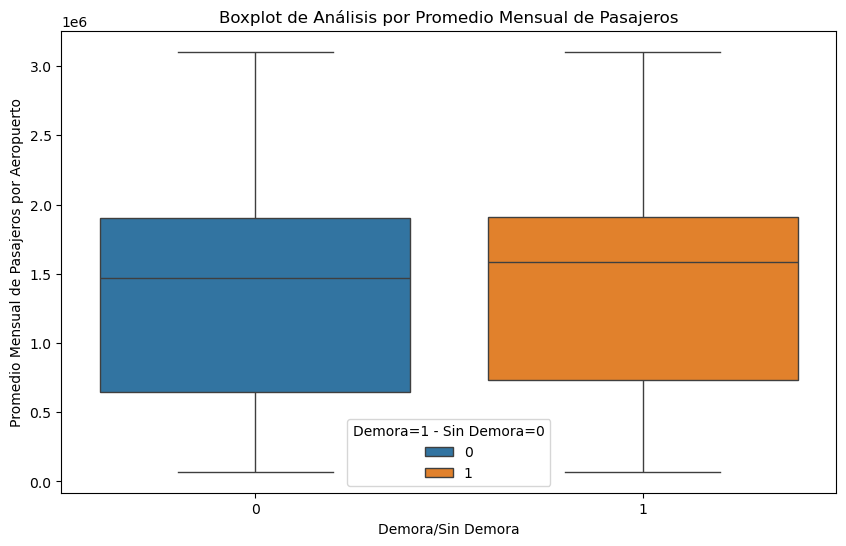

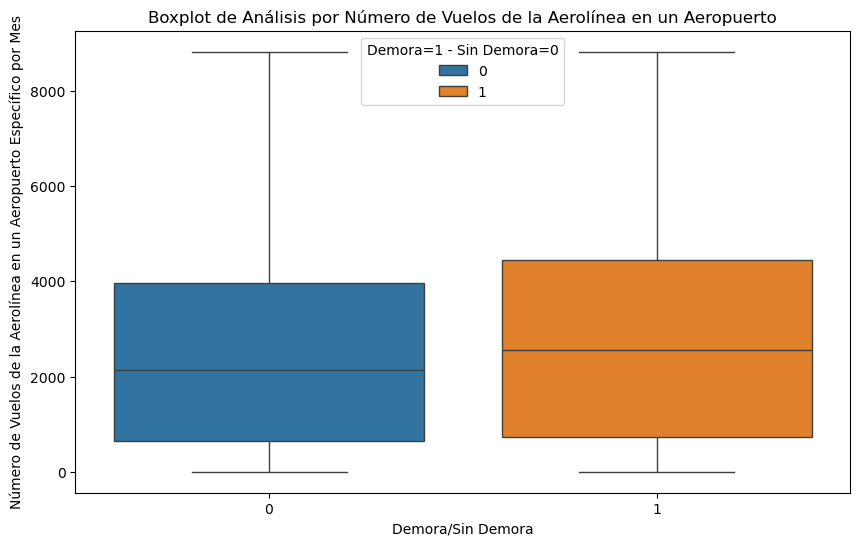

In [17]:
#Por número de vuelos que se realizan concurrentemente
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.CONCURRENT_FLIGHTS, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Vuelos Concurrentes')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Vuelos Concurrentes')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Promedio Mensual de Pasajeros que pasan por el Aeropuerto
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AVG_MONTHLY_PASS_AIRPORT, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Promedio Mensual de Pasajeros')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Promedio Mensual de Pasajeros por Aeropuerto')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por número de vuelos que se realizan concurrentemente
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AIRLINE_AIRPORT_FLIGHTS_MONTH, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Número de Vuelos de la Aerolínea en un Aeropuerto')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Número de Vuelos de la Aerolínea en un Aeropuerto Específico por Mes')
plt.legend(title='Demora=1 - Sin Demora=0')

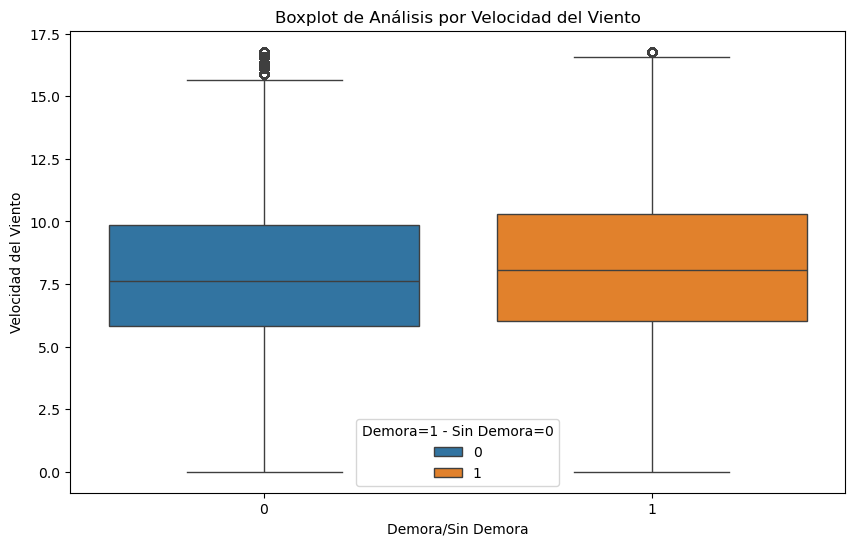

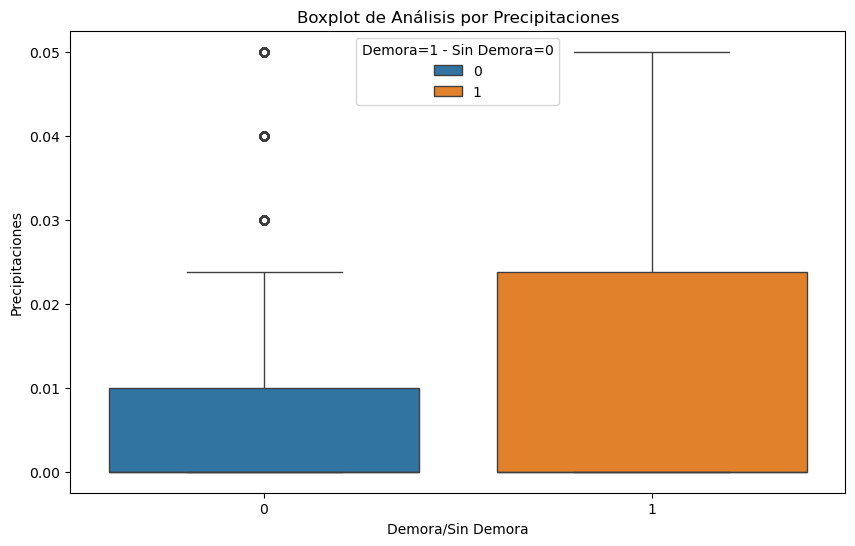

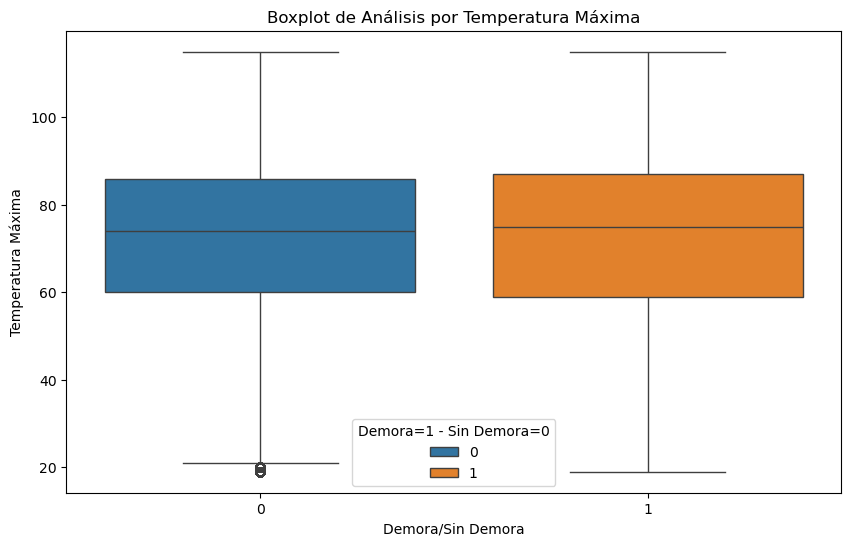

In [18]:
#Por Velocidad del Viento
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.AWND, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Velocidad del Viento')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Velocidad del Viento')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Precipitaciones
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.PRCP, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Precipitaciones')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Precipitaciones')
plt.legend(title='Demora=1 - Sin Demora=0')

#Por Temperatura Máxima
plt.figure(figsize=(10,6))
sns.boxplot(x=df.DEP_DEL15, y= df.TMAX, hue=df.DEP_DEL15)
plt.title('Boxplot de Análisis por Temperatura Máxima')
plt.xlabel('Demora/Sin Demora')
plt.ylabel('Temperatura Máxima')
plt.legend(title='Demora=1 - Sin Demora=0')

## Categorical Columns Transformations

In [22]:
to_drop = ['DAY_OF_WEEK','DISTANCE_GROUP','SEGMENT_NUMBER',
           'AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH','AVG_MONTHLY_PASS_AIRLINE',
          'FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','DEPARTING_AIRPORT',
          'LATITUDE','LONGITUDE','PREVIOUS_AIRPORT']
df = df.drop(columns=to_drop)
df.head()

Unnamed: 0  MONTH  DEP_DEL15 DEP_TIME_BLK  CONCURRENT_FLIGHTS  \
0           0      1          0    0800-0859                25.0   
1           1      1          0    0700-0759                29.0   
2           2      1          0    0600-0659                27.0   
3           3      1          0    0600-0659                27.0   
4           4      1          0    0001-0559                10.0   

   NUMBER_OF_SEATS            CARRIER_NAME  AIRLINE_AIRPORT_FLIGHTS_MONTH  \
0            143.0  Southwest Airlines Co.                         5873.0   
1            191.0    Delta Air Lines Inc.                         1174.0   
2            199.0    Delta Air Lines Inc.                         1174.0   
3            180.0    Delta Air Lines Inc.                         1174.0   
4            182.0        Spirit Air Lines                         1257.0   

   AVG_MONTHLY_PASS_AIRPORT  PLANE_AGE  PRCP  SNOW  SNWD  TMAX  AWND  
0                 1903352.0        8.0   0.0   0.0   0.0  65.0  2.91  
1                 1903352.0        3.0   0.0   0.0   0.0  65.0  2.91  
2                 1903352.0       18.0   0.0   0.0   0.0  65.0  2.91  
3                 1903352.0        2.0   0.0   0.0   0.0  65.0  2.91  
4                 1903352.0        1.0   0.0   0.0   0.0  65.0  2.91

In [24]:
ohe = OneHotEncoder(sparse_output=False, ).fit(df[['CARRIER_NAME','DEP_TIME_BLK','MONTH']])
encoded = ohe.transform(df[['CARRIER_NAME','DEP_TIME_BLK','MONTH']])
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=df.index)

In [26]:
encoded_df

CARRIER_NAME_Alaska Airlines Inc.  CARRIER_NAME_Allegiant Air  \
0                                      0.0                         0.0   
1                                      0.0                         0.0   
2                                      0.0                         0.0   
3                                      0.0                         0.0   
4                                      0.0                         0.0   
...                                    ...                         ...   
6460584                                0.0                         0.0   
6460585                                0.0                         0.0   
6460586                                0.0                         0.0   
6460587                                0.0                         0.0   
6460588                                0.0                         0.0   

         CARRIER_NAME_American Airlines Inc.  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   
...                                      ...   
6460584                                  0.0   
6460585                                  0.0   
6460586                                  0.0   
6460587                                  0.0   
6460588                                  0.0   

         CARRIER_NAME_American Eagle Airlines Inc.  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
6460584                                        0.0   
6460585                                        0.0   
6460586                                        0.0   
6460587                                        0.0   
6460588                                        0.0   

         CARRIER_NAME_Atlantic Southeast Airlines  CARRIER_NAME_Comair Inc.  \
0                                             0.0                       0.0   
1                                             0.0                       0.0   
2                                             0.0                       0.0   
3                                             0.0                       0.0   
4                                             0.0                       0.0   
...                                           ...                       ...   
6460584                                       0.0                       0.0   
6460585                                       0.0                       0.0   
6460586                                       0.0                       0.0   
6460587                                       0.0                       0.0   
6460588                                       0.0                       0.0   

         CARRIER_NAME_Delta Air Lines Inc.  CARRIER_NAME_Endeavor Air Inc.  \
0                                      0.0                             0.0   
1                                      1.0                             0.0   
2                                      1.0                             0.0   
3                                      1.0                             0.0   
4                                      0.0                             0.0   
...                                    ...                             ...   
6460584                                0.0                             0.0   
6460585                                0.0                             0.0   
6460586                                0.0                             0.0   
6460587                                0.0                             0.0   
6460588                                0.0                             0.0   

        

In [28]:
df_final = pd.concat([df, encoded_df], axis='columns')
df_final = df_final.drop(columns=['DEP_TIME_BLK','CARRIER_NAME','MONTH','Unnamed: 0'])
df_final

DEP_DEL15  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0                0                25.0            143.0   
1                0                29.0            191.0   
2                0                27.0            199.0   
3                0                27.0            180.0   
4                0                10.0            182.0   
...            ...                 ...              ...   
6460584          0                 3.0            123.0   
6460585          0                 2.0            123.0   
6460586          0                 2.0            123.0   
6460587          0                 3.0            123.0   
6460588          1                 3.0            123.0   

         AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  PLANE_AGE  \
0                               5873.0                 1903352.0        8.0   
1                               1174.0                 1903352.0        3.0   
2                               1174.0                 1903352.0       18.0   
3                               1174.0                 1903352.0        2.0   
4                               1257.0                 1903352.0        1.0   
...                                ...                       ...        ...   
6460584                          757.0                  133573.0       18.0   
6460585                          757.0                  133573.0       16.0   
6460586                          757.0                  133573.0       18.0   
6460587                          757.0                  133573.0       18.0   
6460588                          757.0                  133573.0       15.0   

             PRCP  SNOW  SNWD  TMAX  ...  MONTH_3  MONTH_4  MONTH_5  MONTH_6  \
0        0.000000   0.0   0.0  65.0  ...      0.0      0.0      0.0      0.0   
1        0.000000   0.0   0.0  65.0  ...      0.0      0.0      0.0      0.0   
2        0.000000   0.0   0.0  65.0  ...      0.0      0.0      0.0      0.0   
3        0.000000   0.0   0.0  65.0  ...      0.0      0.0      0.0      0.0   
4        0.000000   0.0   0.0  65.0  ...      0.0      0.0      0.0      0.0   
...           ...   ...   ...   ...  ...      ...      ...      ...      ...   
6460584  0.023773   0.0   0.0  84.0  ...      0.0      0.0      0.0      0.0   
6460585  0.023773   0.0   0.0  84.0  ...      0.0      0.0      0.0      0.0   
6460586  0.023773   0.0   0.0  84.0  ...      0.0      0.0      0.0      0.0   
6460587  0.023773   0.0   0.0  84.0  ...      0.0      0.0      0.0      0.0   
6460588  0.023773   0.0   0.0  84.0  ...      0.0      0.0      0.0      0.0   

         MONTH_7  MONTH_8  MONTH_9  MONTH_10  MONTH_11  MONTH_12  
0            0.0      0.0      0.0       0.0       0.0       0.0  
1            0.0      0.0      0.0       0.0       0.0       0.0  
2            0.0      0.0      0.0       0.0       0.0       0.0  
3            0.0      0.0      0.0       0.0       0.0       0.0  
4            0.0      0.0      0.0       0.0       0.0       0.0  
...          ...      ...      ...       ...       ...       ...  
6460584      0.0      0.0      0.0       0.0       0.0       1.0  
6460585      0.0      0.0      0.0       0.0       0.0       1.0  
6460586      0.0      0.0      0.0       0.0       0.0       1.0  
6460587      0.0      0.0      0.0       0.0       0.0       1.0  
6460588      0.0      0.0      0.0       0.0       0.0       1.0  

[6460589 rows x 59 columns]

## Feature Engineering

In [30]:
df_final['TMAX_R2'] = np.sqrt(df_final['TMAX'])
df_final['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'] = np.log(df_final['AIRLINE_AIRPORT_FLIGHTS_MONTH'] + 1)
df_final['CONCURRENT_FLIGHTS_LOG'] = np.log(df_final['CONCURRENT_FLIGHTS'] + 1)
df_final = df_final.drop(columns=['TMAX','AIRLINE_AIRPORT_FLIGHTS_MONTH'])

In [31]:
df_final

DEP_DEL15  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0                0                25.0            143.0   
1                0                29.0            191.0   
2                0                27.0            199.0   
3                0                27.0            180.0   
4                0                10.0            182.0   
...            ...                 ...              ...   
6460584          0                 3.0            123.0   
6460585          0                 2.0            123.0   
6460586          0                 2.0            123.0   
6460587          0                 3.0            123.0   
6460588          1                 3.0            123.0   

         AVG_MONTHLY_PASS_AIRPORT  PLANE_AGE      PRCP  SNOW  SNWD   AWND  \
0                       1903352.0        8.0  0.000000   0.0   0.0   2.91   
1                       1903352.0        3.0  0.000000   0.0   0.0   2.91   
2                       1903352.0       18.0  0.000000   0.0   0.0   2.91   
3                       1903352.0        2.0  0.000000   0.0   0.0   2.91   
4                       1903352.0        1.0  0.000000   0.0   0.0   2.91   
...                           ...        ...       ...   ...   ...    ...   
6460584                  133573.0       18.0  0.023773   0.0   0.0  15.21   
6460585                  133573.0       16.0  0.023773   0.0   0.0  15.21   
6460586                  133573.0       18.0  0.023773   0.0   0.0  15.21   
6460587                  133573.0       18.0  0.023773   0.0   0.0  15.21   
6460588                  133573.0       15.0  0.023773   0.0   0.0  15.21   

         CARRIER_NAME_Alaska Airlines Inc.  ...  MONTH_5  MONTH_6  MONTH_7  \
0                                      0.0  ...      0.0      0.0      0.0   
1                                      0.0  ...      0.0      0.0      0.0   
2                                      0.0  ...      0.0      0.0      0.0   
3                                      0.0  ...      0.0      0.0      0.0   
4                                      0.0  ...      0.0      0.0      0.0   
...                                    ...  ...      ...      ...      ...   
6460584                                0.0  ...      0.0      0.0      0.0   
6460585                                0.0  ...      0.0      0.0      0.0   
6460586                                0.0  ...      0.0      0.0      0.0   
6460587                                0.0  ...      0.0      0.0      0.0   
6460588                                0.0  ...      0.0      0.0      0.0   

         MONTH_8  MONTH_9  MONTH_10  MONTH_11  MONTH_12   TMAX_R2  \
0            0.0      0.0       0.0       0.0       0.0  8.062258   
1            0.0      0.0       0.0       0.0       0.0  8.062258   
2            0.0      0.0       0.0       0.0       0.0  8.062258   
3            0.0      0.0       0.0       0.0       0.0  8.062258   
4            0.0      0.0       0.0       0.0       0.0  8.062258   
...          ...      ...       ...       ...       ...       ...   
6460584      0.0      0.0       0.0       0.0       1.0  9.165151   
6460585      0.0      0.0       0.0       0.0       1.0  9.165151   
6460586      0.0      0.0       0.0       0.0       1.0  9.165151   
6460587      0.0      0.0       0.0       0.0       1.0  9.165151   
6460588      0.0      0.0       0.0       0.0       1.0  9.165151   

         AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG  
0                                 8.678291  
1                                 7.069023  
2                                 7.069023  
3                                 7.069023  
4                                 7.137278  
...                                    ...  
6460584                           6.630683  
6460585                           6.630683  
6460586                           6.630683  
6460587                           6.630683  
6460588                           6.630683  

[6460589 rows x 59 columns]

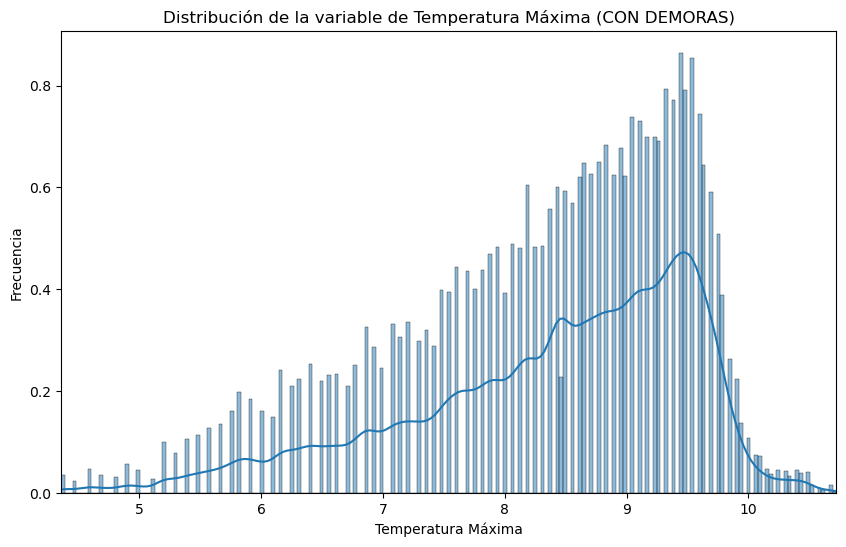

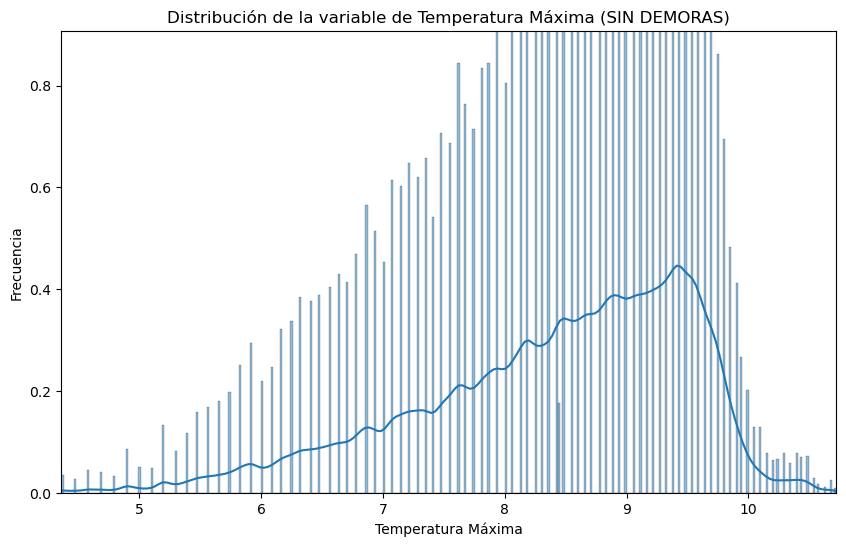

In [33]:
# Filtramos por con y sin demora
df_CD = df_final[df_final['DEP_DEL15'] == 1]
df_SD = df_final[df_final['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['TMAX_R2'].min(), df_SD['TMAX_R2'].min())
max_x = max(df_CD['TMAX_R2'].max(), df_SD['TMAX_R2'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['TMAX_R2'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['TMAX_R2'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Temperatura Máxima')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Temperatura Máxima (SIN DEMORAS)')
plt.show()

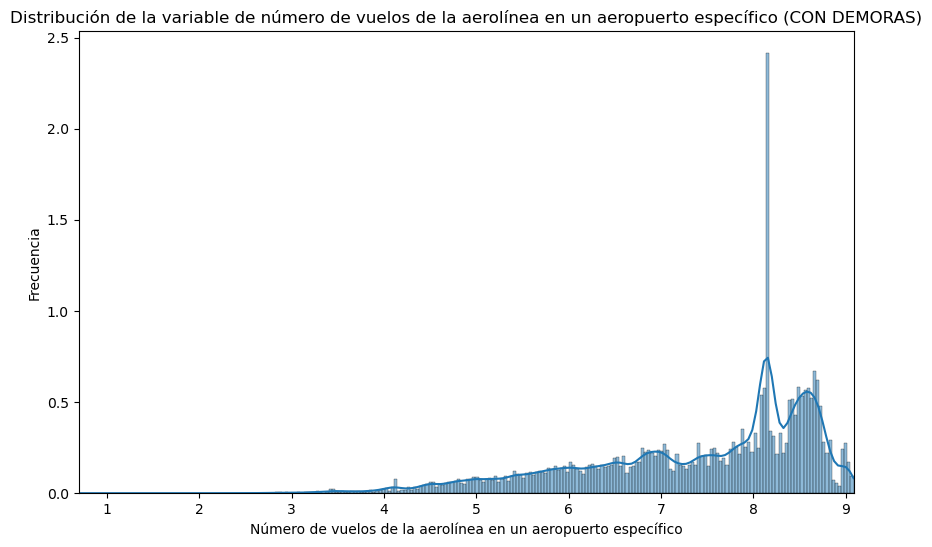

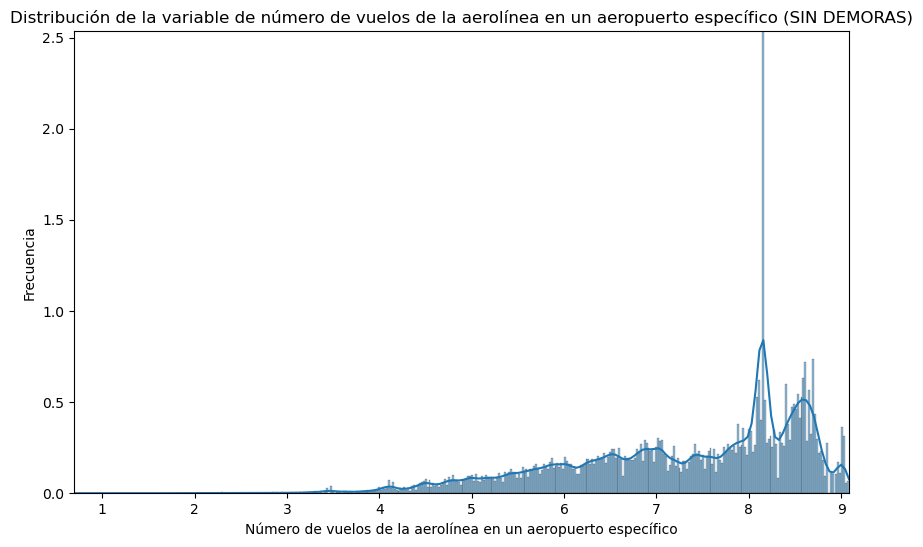

In [34]:
# Filtramos por con y sin demora
df_CD = df_final[df_final['DEP_DEL15'] == 1]
df_SD = df_final[df_final['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'].min(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'].min())
max_x = max(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'].max(), df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Número de vuelos de la aerolínea en un aeropuerto específico')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de número de vuelos de la aerolínea en un aeropuerto específico (SIN DEMORAS)')
plt.show()

In [36]:
df_final['CONCURRENT_FLIGHTS_LOG'] = np.log(df_final['CONCURRENT_FLIGHTS'] + 1)
df_final = df_final.drop(columns=['CONCURRENT_FLIGHTS'])

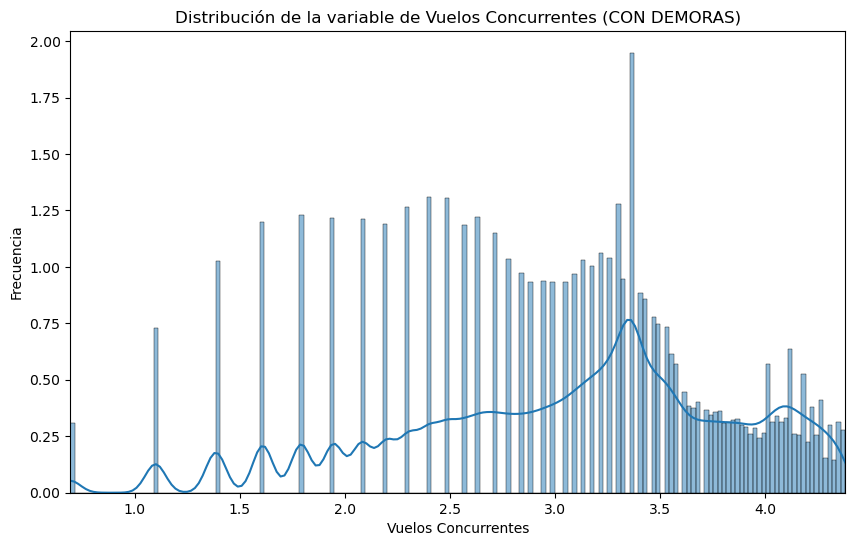

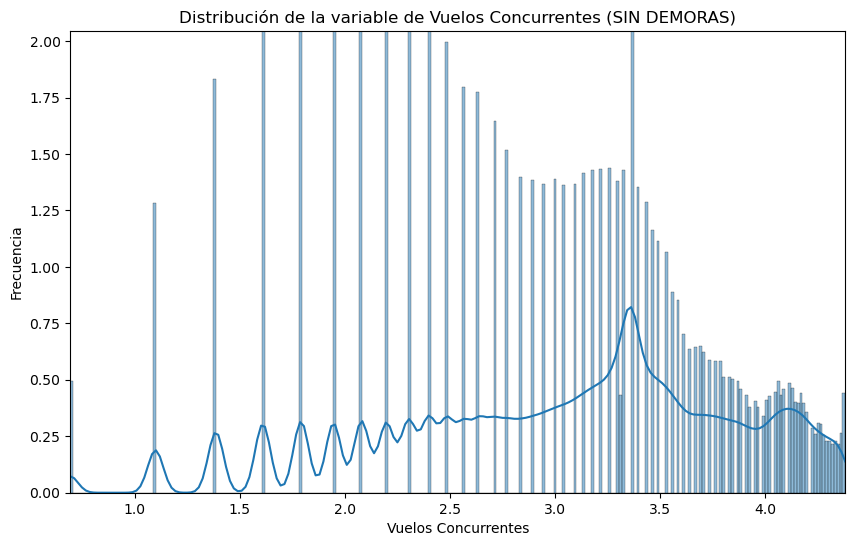

In [40]:
# Filtramos por con y sin demora
df_CD = df_final[df_final['DEP_DEL15'] == 1]
df_SD = df_final[df_final['DEP_DEL15'] == 0]

# Determinar los límites comunes para ambos gráficos
min_x = min(df_CD['CONCURRENT_FLIGHTS_LOG'].min(), df_SD['CONCURRENT_FLIGHTS_LOG'].min())
max_x = max(df_CD['CONCURRENT_FLIGHTS_LOG'].max(), df_SD['CONCURRENT_FLIGHTS_LOG'].max())

# Crear el histograma para la situación de los vuelos con demoras
plt.figure(figsize=(10, 6))
ax1 = sns.histplot(df_CD['CONCURRENT_FLIGHTS_LOG'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (CON DEMORAS)')

# Obtener el límite máximo del eje y
max_y = ax1.get_ylim()[1]
plt.show()

# Crear el histograma para la situación de los vuelos sin demoras
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(df_SD['CONCURRENT_FLIGHTS_LOG'], kde=True, stat='density')
plt.xlim(min_x, max_x)
plt.ylim(0, max_y)  # Aplicar el mismo límite en el eje y
plt.xlabel('Vuelos Concurrentes')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable de Vuelos Concurrentes (SIN DEMORAS)')
plt.show()

In [41]:
df_final

DEP_DEL15  NUMBER_OF_SEATS  AVG_MONTHLY_PASS_AIRPORT  PLANE_AGE  \
0                0            143.0                 1903352.0        8.0   
1                0            191.0                 1903352.0        3.0   
2                0            199.0                 1903352.0       18.0   
3                0            180.0                 1903352.0        2.0   
4                0            182.0                 1903352.0        1.0   
...            ...              ...                       ...        ...   
6460584          0            123.0                  133573.0       18.0   
6460585          0            123.0                  133573.0       16.0   
6460586          0            123.0                  133573.0       18.0   
6460587          0            123.0                  133573.0       18.0   
6460588          1            123.0                  133573.0       15.0   

             PRCP  SNOW  SNWD   AWND  CARRIER_NAME_Alaska Airlines Inc.  \
0        0.000000   0.0   0.0   2.91                                0.0   
1        0.000000   0.0   0.0   2.91                                0.0   
2        0.000000   0.0   0.0   2.91                                0.0   
3        0.000000   0.0   0.0   2.91                                0.0   
4        0.000000   0.0   0.0   2.91                                0.0   
...           ...   ...   ...    ...                                ...   
6460584  0.023773   0.0   0.0  15.21                                0.0   
6460585  0.023773   0.0   0.0  15.21                                0.0   
6460586  0.023773   0.0   0.0  15.21                                0.0   
6460587  0.023773   0.0   0.0  15.21                                0.0   
6460588  0.023773   0.0   0.0  15.21                                0.0   

         CARRIER_NAME_Allegiant Air  ...  MONTH_6  MONTH_7  MONTH_8  MONTH_9  \
0                               0.0  ...      0.0      0.0      0.0      0.0   
1                               0.0  ...      0.0      0.0      0.0      0.0   
2                               0.0  ...      0.0      0.0      0.0      0.0   
3                               0.0  ...      0.0      0.0      0.0      0.0   
4                               0.0  ...      0.0      0.0      0.0      0.0   
...                             ...  ...      ...      ...      ...      ...   
6460584                         0.0  ...      0.0      0.0      0.0      0.0   
6460585                         0.0  ...      0.0      0.0      0.0      0.0   
6460586                         0.0  ...      0.0      0.0      0.0      0.0   
6460587                         0.0  ...      0.0      0.0      0.0      0.0   
6460588                         0.0  ...      0.0      0.0      0.0      0.0   

         MONTH_10  MONTH_11  MONTH_12   TMAX_R2  \
0             0.0       0.0       0.0  8.062258   
1             0.0       0.0       0.0  8.062258   
2             0.0       0.0       0.0  8.062258   
3             0.0       0.0       0.0  8.062258   
4             0.0       0.0       0.0  8.062258   
...           ...       ...       ...       ...   
6460584       0.0       0.0       1.0  9.165151   
6460585       0.0       0.0       1.0  9.165151   
6460586       0.0       0.0       1.0  9.165151   
6460587       0.0       0.0       1.0  9.165151   
6460588       0.0       0.0       1.0  9.165151   

         AIRLINE_AIRPORT_FLIGHTS_MONTH_LOG  CONCURRENT_FLIGHTS_LOG  
0                                 8.678291                3.258097  
1                                 7.069023                3.401197  
2                                 7.069023                3.332205  
3                                 7.069023                3.332205  
4                                 7.137278                2.397895  
...                                    ...                     ...  
6460584                           6.630683                1.386294  
6460585                           6.630683                1.098612  


In [44]:
df_final.to_csv('C:/Users/jmorano/Documents/Plantillas personalizadas de Office/Coderhouse/Data Science/Modulo 2 - Data Science Fundamentos para la Ciencia de Datos II/Proyecto - Juan Martin Morano/Data/Processed/FlyDelayPredictor_To_Train.csv')